<h1><p style="text-align:center";> PROJET VII <br/><br/> Prédiction de Revenus </p> </h1>

<h2>
    <p style="text-align:center";>
        Formation de Data Analyst <br/> <br/>
        OpenClassrooms - ENSAE-ENSAI Formation Continue <br/>
    </p>
</h2>


<h3>
    <p style="text-align:center";>
        David JEAN-GEORGES <br/><br/>
        Avril 2021 <br/>
    </p>
</h3>

Data source 1 : [Données de la World Income Distribution, datée de 2008](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/data-projet7.csv) <br/> 

Data source 2 : [Liste des Pays du monde](https://sql.sh/ressources/sql-pays/sql-pays.csv) <br/> 

Data source 3 : [Indices de Gini estimés par la Banque mondiale](http://data.worldbank.org/indicator/SI.POV.GINI) <br/> 

Data source 4 :  [Données de la worldbank](https://data.worldbank.org/indicator/SP.POP.TOTL) <br/> 

Data source 4 :  [Données de la population mondiale (FAO)](http://www.fao.org/faostat/fr/#data/OA) <br/> 







<h3>
CONTEXTE
</h3>

Une banque présente dans de nombreux pays à travers le monde souhaite cibler de nouveaux clients potentiels, particulièrement les jeunes en âge d'ouvrir leur tout premier compte bancaire. Cependant, elle souhaite cibler les prospects les plus susceptibles d'avoir, plus tard dans leur vie, de hauts revenus. <br/>

Vous êtes employé par cette banque, et votre équipe de travail a donc reçu pour mission de **créer un modèle permettant de déterminer le revenu potentiel d'une personne.**



<h4>
OBJECTIFS
</h4>

**Mission 1**
Résumez les données utilisées 
* Année(s) des données utilisées ;
* Nombre de pays présents ;
* Population couverte par l'analyse (en termes de pourcentage de la population mondiale);

Les données de la World Income Distribution présentent pour chaque pays les quantiles de la distribution des revenus de leur population respective.
* De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?
* Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?
<br/>  <br/>  


**Mission 2** <br/>
* Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique.
* Représentez la courbe de Lorenz de chacun des pays choisis.
* Représentez l'évolution de l'indice de Gini au fil des ans, pour chacun de ces pays.
* Classez les pays par indice de Gini. En quelle position se trouve la France ?


**Mission 3** <br/>
* M 

###### ------------------------------------------------------------------------------------------- **Solution** ----------------------------------------------------------------------------------------------------------

  <h4>IMPORTATION DES DONNEES ET DES LIBRAIRIES PYTHON</h4>

In [1]:
#Librairies Python pour le traitement des données
import pandas as pd
import seaborn as sns
import scipy.stats as st
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition



from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
#Paramètres graphiques
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['font.size'] = 14

In [3]:
#Chargement du dataset, Fichier de la World Income Distribution
data = pd.read_csv('data.csv', decimal=",")

data = data.rename(columns={'country': 'country_code', 'year_survey': 'year' , })

data.head()


,country_code,year,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [4]:
# Nombre de colonnes et d'observations
display(data.shape)   

(11599, 6)

In [5]:
#  nombre de pays de notre dataset
is_country=data["country_code"].unique()
len(is_country)

116

 <h2> MISSION 0. PREPARATION DU DATASET </h2>

 <h3> A. Integration des noms des pays </h3>

In [6]:
# liste des pays du monde
# SOURCE : https://sql.sh/ressources/sql-pays/sql-pays.csv

all_country = pd.read_csv('code_pays.csv')
del all_country['pays']
all_country.head()


,country_code,country
0,ALB,Albania
1,ATA,Antarctica
2,DZA,Algeria
3,ASM,American Samoa
4,AND,Andorra


In [7]:
#  nombre de pays total

len (all_country["country"].unique())


240

In [8]:
# Identifier le pays de notre dataset dans la liste totale
# par une colonne boleenne

all_country['is_country'] = all_country ['country_code'].isin(is_country)
all_country.head(4)



,country_code,country,is_country
0,ALB,Albania,True
1,ATA,Antarctica,False
2,DZA,Algeria,False
3,ASM,American Samoa,False


In [9]:
# creation d'un nouveau dataframe 
# selectionnant les pays de notre dataset

common_country =all_country.loc[all_country["is_country"] == True]

del common_country["is_country"]

common_country.head()


,country_code,country
0,ALB,Albania
7,AZE,Azerbaijan
8,ARG,Argentina
10,AUT,Austria
13,BGD,Bangladesh


In [10]:
print(len(common_country))


print(" ")
print("***********************************************************************")
print(" ")


print("Notre nouveau dataset contient 113 pays. Il en manque donc trois")


113
 
***********************************************************************
 
Notre nouveau dataset contient 113 pays. Il en manque donc trois


In [11]:
# Fusionner les dataframe "data" and "common_country"
df_data = pd.merge(common_country,data, how='left', on='country_code')



df_data


,country_code,country,year,quantile,nb_quantiles,income,gdpppp
0,ALB,Albania,2008,1,100,728.89795,7297.0
1,ALB,Albania,2008,2,100,916.66235,7297.0
2,ALB,Albania,2008,3,100,1010.91600,7297.0
3,ALB,Albania,2008,4,100,1086.90780,7297.0
4,ALB,Albania,2008,5,100,1132.69970,7297.0
...,...,...,...,...,...,...,...
11294,YEM,Yemen,2008,96,100,2568.65110,2224.0
11295,YEM,Yemen,2008,97,100,2893.90400,2224.0
11296,YEM,Yemen,2008,98,100,3307.27220,2224.0
11297,YEM,Yemen,2008,99,100,4137.02640,2224.0


In [12]:

len(df_data["country_code"].unique())


113

  **AJOUT DES PAYS MANQUANTS**

In [13]:
# Liste des pays communs entre dataset et liste totale
is_comm_country=common_country["country"].unique()   
len(is_comm_country)   


# colonne boleenne pour odentifier les pays communs
data['data_country'] = data ['country_code'].isin(is_comm_country)
data.head()

# Etraction des pays manquants
miss_country =data.loc[data["data_country"] == False]
miss_country.head()

#Liste des pays manquants
miss_country["country_code"].unique()



array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO',
       'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KOR', 'XKX', 'LAO', 'LBR', 'LKA', 'LTU',
       'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE',
       'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD',
       'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'ROU', 'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ',
       'SYR', 'THA', 'TJK', 'TLS', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR',
       'URY', 'USA', 'VEN', 'VNM', 'PSE', 'YEM', 'ZAF', 'COD'],
      dtype=object)

In [14]:
# CAS DU MONTENEGRO  (MNE)
df_mne= data.loc[(data["country_code"]== "MNE")]   # (dataframe contenant les date du MNE)
del df_mne["data_country"] # (delete la colonne boleenne "data country")
df_mne

df_mne=df_mne.assign(country="Montenegro") # (Ajout de la colonne "country")
df_mne.head()

,country_code,year,quantile,nb_quantiles,income,gdpppp,country
7099,MNE,2008,1,100,1344.2195,10556.0,Montenegro
7100,MNE,2008,2,100,1893.5167,10556.0,Montenegro
7101,MNE,2008,3,100,2072.8757,10556.0,Montenegro
7102,MNE,2008,4,100,2272.3376,10556.0,Montenegro
7103,MNE,2008,5,100,2379.2500,10556.0,Montenegro


In [15]:
# CAS DU SERBIE (SRB)
df_srb= data.loc[(data["country_code"]== "SRB")]   # (dataframe contenant les date du XKX)
del df_srb["data_country"] # (delete la colonne boleenne "data country")
df_srb

df_srb.insert(1, 'country', 'Serbia')
df_srb.head()

,country_code,country,year,quantile,nb_quantiles,income,gdpppp
9399,SRB,Serbia,2008,1,100,953.28656,10234.0
9400,SRB,Serbia,2008,2,100,1468.32750,10234.0
9401,SRB,Serbia,2008,3,100,1689.42580,10234.0
9402,SRB,Serbia,2008,4,100,1830.63170,10234.0
9403,SRB,Serbia,2008,5,100,1930.23070,10234.0


In [16]:
# CAS DU KOSOVO (XKX)
df_xkx= data.loc[(data["country_code"]== "XKX")]   # (dataframe contenant les date du XKX)
del df_xkx["data_country"] # (delete la colonne boleenne "data country")
df_xkx

# Ajout de KOSOVO a colonne Country
df_xkx=df_xkx.assign(country="Kosovo") # (Ajout de la colonne "country")
df_xkx

# Ajout de la valeur GDPPP manquant
# Source https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2009&locations=XK&start=2008&view=chart
df_xkx=df_xkx.assign(gdpppp="7249") 
df_xkx.head()

,country_code,year,quantile,nb_quantiles,income,gdpppp,country
5800,XKX,2008,1,100,437.89370,7249,Kosovo
5801,XKX,2008,2,100,508.17133,7249,Kosovo
5802,XKX,2008,3,100,591.82820,7249,Kosovo
5803,XKX,2008,4,100,668.00000,7249,Kosovo
5804,XKX,2008,5,100,730.40220,7249,Kosovo


In [17]:
# fusion des dataframes des 3 pays manquants
df_miss_country = pd.concat([df_srb,df_mne, df_xkx], ignore_index = True)
df_miss_country.head()

,country_code,country,year,quantile,nb_quantiles,income,gdpppp
0,SRB,Serbia,2008,1,100,953.28656,10234
1,SRB,Serbia,2008,2,100,1468.32750,10234
2,SRB,Serbia,2008,3,100,1689.42580,10234
3,SRB,Serbia,2008,4,100,1830.63170,10234
4,SRB,Serbia,2008,5,100,1930.23070,10234


In [18]:
# AJOUTER LES 3 PAYS MANQUANTS AU DATASET DE TRAVAIL

# fusion des dataframes
df_final = pd.concat([df_data, df_miss_country], ignore_index = True)


In [19]:
# nombre de pays du dataset 
len(df_final["country_code"].unique())

116

<h3> B. Exploration du Dataset et ajout de données </h3>

In [20]:
# Affichage des data en fonction des annees (groupby par annee)
df_final.groupby(by=['year'])["country", "country_code"].nunique().reset_index()


C:\Users\david\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,year,country,country_code
0,2004,1,1
1,2006,5,5
2,2007,15,15
3,2008,76,76
4,2009,12,12
5,2010,6,6
6,2011,1,1


**Commentaires / Interpretation**
* Plus de donnéespour l'annee 2008 que les autres annees (76 pays)
* Un seul pays pour l'annee 2004
* Un seul pays pour l'annee 2005


In [21]:
# # Affichage des data en fonction des pays (groupby par "pays")

grp_country= df_final.groupby(by=['country']).count()
grp_country.head()

,country_code,year,quantile,nb_quantiles,income,gdpppp
country,,,,,,
Albania,100,100,100,100,100,100
Argentina,100,100,100,100,100,100
Armenia,100,100,100,100,100,100
Austria,100,100,100,100,100,100
Azerbaijan,100,100,100,100,100,100


In [22]:
print("Apparemment touts les pays ont 100 observations chacun. Let's check!.")

Apparemment touts les pays ont 100 observations chacun. Let's check!.


In [23]:
# check to see ifall countries are same number of observations

print(grp_country[grp_country['quantile'] < 100])

print(" ")
print("***********************************************************************")
print(" ")

print(grp_country[grp_country['quantile'] > 100])

           country_code  year  quantile  nb_quantiles  income  gdpppp
country                                                              
Lithuania            99    99        99            99      99      99
 
***********************************************************************
 
Empty DataFrame
Columns: [country_code, year, quantile, nb_quantiles, income, gdpppp]
Index: []


**Commentaires/Interpretation**
* La LTU en manque une

<h4> B.1. TRAITEMENT DU CAS DE LA "LTU"</h4>

In [24]:
# TROUVER QUELLE OBSERVATION MANQUE A LA lITUANIE

# dataframe contenant exclusivement les donnees de la LTU
df_LTU= df_final.loc[df_final['country_code'] == 'LTU']
df_LTU.head()

# Liste des quantiles de la LTUs
LTU_quantile=df_LTU["quantile"].unique()
print(LTU_quantile)


print(" ")
print("***********************************************************************")
print(" ")


print("L'Observation 41 manque à la LTU")


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100]
 
***********************************************************************
 
L'Observation 41 manque à la LTU


**Création de la ligne manquante**

In [25]:
# dataframe LTU
df_LTU= df_final.loc[df_final['country_code'] == 'LTU']  
print (df_LTU)

print(" ")
print("***********************************************************************")
print(" ")

# moyenne colonne "income" pout  ltu
df_LTU_income_moy=df_LTU["income"].mean()
print("La valeur moyenne de la colonne INCOME pour la LTU est de", df_LTU_income_moy)

print(" ")
print("***********************************************************************")
print(" ")

# valeurs ligne 41 LTU
ltu_41_income=df_LTU_income_moy
print("La valeur du INCOME manquant est de", ltu_41_income)
ltu_41_gdpppp=df_final.iloc[6240, 6]
print("La valeur du GDPPPP manquant est de", ltu_41_gdpppp)

print(" ")
print("***********************************************************************")


#Création de la ligne manquante selon de la LTU
ltu_41_row = pd.DataFrame({'country_code': ['LTU'], 'country': ['Lithuania'], 'year': [2008], 'quantile': [41], 
                           'nb_quantiles': [100], 'income': [ltu_41_income], 'gdpppp': [17571.0]})
ltu_41_row

     country_code    country  year  quantile  nb_quantiles      income gdpppp
6200          LTU  Lithuania  2008         1           100    566.3453  17571
6201          LTU  Lithuania  2008         2           100   1147.0587  17571
6202          LTU  Lithuania  2008         3           100   1490.8408  17571
6203          LTU  Lithuania  2008         4           100   1746.5715  17571
6204          LTU  Lithuania  2008         5           100   1842.9542  17571
...           ...        ...   ...       ...           ...         ...    ...
6294          LTU  Lithuania  2008        96           100  14597.0360  17571
6295          LTU  Lithuania  2008        97           100  15659.0080  17571
6296          LTU  Lithuania  2008        98           100  17883.8770  17571
6297          LTU  Lithuania  2008        99           100  22551.1700  17571
6298          LTU  Lithuania  2008       100           100  38836.5300  17571

[99 rows x 7 columns]
 
***************************************

,country_code,country,year,quantile,nb_quantiles,income,gdpppp
0,LTU,Lithuania,2008,41,100,6641.247634,17571.0


**Ajout de la ligne 41 LTU au dataset**

In [26]:
# coupure du dataframe en deux parties
df_final_part1= df_final.loc [ : 6239]
df_final_part1


df_final_part2= df_final.loc [6240 : ]
df_final_part2



# AJout de la ligne 41 LU dans la premiere partie du dataset

df_final_part1_ltu = pd.concat([df_final_part1, ltu_41_row], ignore_index=True, sort=True)
df_final_part1_ltu.shape

# Fusionner avce la deuxieme partie du dataset
df_final_1 = pd.concat([df_final_part1_ltu, df_final_part2], sort=True, ignore_index = True)

df_final_1



,country,country_code,gdpppp,income,nb_quantiles,quantile,year
0,Albania,ALB,7297,728.89795,100,1,2008
1,Albania,ALB,7297,916.66235,100,2,2008
2,Albania,ALB,7297,1010.91600,100,3,2008
3,Albania,ALB,7297,1086.90780,100,4,2008
4,Albania,ALB,7297,1132.69970,100,5,2008
...,...,...,...,...,...,...,...
11595,Kosovo,XKX,7249,5155.36470,100,96,2008
11596,Kosovo,XKX,7249,5689.52930,100,97,2008
11597,Kosovo,XKX,7249,6233.73930,100,98,2008
11598,Kosovo,XKX,7249,7366.67700,100,99,2008


In [27]:
#verificationligne 41
df_final_1.iloc[6240: 6241]


,country,country_code,gdpppp,income,nb_quantiles,quantile,year
6240,Lithuania,LTU,17571,6641.247634,100,41,2008


In [28]:
# nombre de lignes t de colonnes
df_final_1.shape

(11600, 7)

In [29]:
len(df_final_1["country_code"].unique())


116

  <h4> B.2. NETTOYAGE ET TRAITEMENT DU DATASET </h4>

<h4> B.2.1. Valeurs manquantes et nulles</h4>

In [30]:
# verification de presence de valeurs manquantes 
data_null=df_final_1.isnull().any()
print(data_null)


country         False
country_code    False
gdpppp           True
income          False
nb_quantiles    False
quantile        False
year            False
dtype: bool


In [31]:
# show rows with NAN values
df_pse=df_final_1[df_final_1.isna().any(axis=1)]
df_pse.head()

# Ajout du GDPP manquant pour la PSE
# #Source https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2009&locations=XK&start=2008&view=chart
df_pse=df_pse.assign(gdpppp="3562") 
df_pse

# delete PSE with NAN dans datadrame df_total
no_pse=df_final_1.loc[df_final_1["country_code"] !="PSE"]
no_pse.shape


# fusion avec dataframe principal
df_total= pd.concat([no_pse,df_pse])
df_total.head()

,country,country_code,gdpppp,income,nb_quantiles,quantile,year
0,Albania,ALB,7297,728.89795,100,1,2008
1,Albania,ALB,7297,916.66235,100,2,2008
2,Albania,ALB,7297,1010.91600,100,3,2008
3,Albania,ALB,7297,1086.90780,100,4,2008
4,Albania,ALB,7297,1132.69970,100,5,2008


In [32]:
# nouvelle  verification de presence de valeurs manquantes
data_null_2=df_total.isnull().any()
print(data_null_2)

country         False
country_code    False
gdpppp          False
income          False
nb_quantiles    False
quantile        False
year            False
dtype: bool


<h4> B.2.2. Les doublons </h4>

In [33]:
print(df_total.duplicated().sum())

0


<h4> B.2.3.Des Outliers </h4>

In [34]:
# variable INCOME
max_incom= df_total.nlargest(2, ['income'])
print(max_incom)

print(" ")
print("***********************************************************************")

min_incom= df_total.nsmallest(2, ['income'])
print(min_incom)


             country country_code gdpppp     income  nb_quantiles  quantile  \
10899  United States          USA  43261  176928.55           100       100   
4499         Iceland          ISL  36527  160645.27           100       100   

       year  
10899  2008  
4499   2008  
 
***********************************************************************
                country country_code gdpppp     income  nb_quantiles  \
1900              China          CHN   5712  16.719418           100   
5700  Republic of Korea          KOR  19162  17.317732           100   

      quantile  year  
1900         1  2007  
5700         1  2008  


In [35]:
# Convert en FLOAT data des variables " gdppp"

df_total["gdpppp"] = pd.to_numeric(df_total["gdpppp"],errors='coerce')

df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11600 entries, 0 to 3699
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   country_code  11600 non-null  object 
 2   gdpppp        11600 non-null  float64
 3   income        11600 non-null  float64
 4   nb_quantiles  11600 non-null  int64  
 5   quantile      11600 non-null  int64  
 6   year          11600 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 725.0+ KB


In [36]:
# variable GDPPP
max_gdpppp= df_total.nlargest(2, ['gdpppp'])
print(max_gdpppp)

print(" ")
print("***********************************************************************")

min_gdpppp= df_total.nsmallest(2, ['gdpppp'])
print(min_gdpppp)


print(" ")
print("***********************************************************************")


print("la valeur GDPPPP de FIJI parait bien trop élevé, soit:4300332.0" )


     country country_code     gdpppp     income  nb_quantiles  quantile  year
3200    Fiji          FJI  4300332.0  308.17334           100         1  2008
3201    Fiji          FJI  4300332.0  384.33230           100         2  2008
 
***********************************************************************
                                   country country_code     gdpppp     income  \
2200  The Democratic Republic Of The Congo          COD  303.19305  29.364283   
2201  The Democratic Republic Of The Congo          COD  303.19305  40.948640   

      nb_quantiles  quantile  year  
2200           100         1  2008  
2201           100         2  2008  
 
***********************************************************************
la valeur GDPPPP de FIJI parait bien trop élevé, soit:4300332.0


**Cas du FIJI**

In [37]:
# vrai leur GDPPP FIJI en 2008
#https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2008&locations=FJ&start=2008&view=chart
gdppp_fiji_2008=7777.7

# dataframe  FJI dans datadrame df_total
df_fiji=df_total.loc[df_total['country_code'] == "FJI"]
df_fiji


# delete FJI with NAN dans datadrame df_total
no_fji=df_total.loc[df_total["country_code"] !="FJI"]
no_fji

# Ajout de la vraie valeur GDPPP de Fiji
#https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2008&locations=FJ&start=2008&view=chart
df_fiji=df_fiji.assign(gdpppp=gdppp_fiji_2008) 
df_fiji.head()

# fusion avec dataframe principal
df_total= pd.concat([no_fji,df_fiji])
df_total.head()


,country,country_code,gdpppp,income,nb_quantiles,quantile,year
0,Albania,ALB,7297.0,728.89795,100,1,2008
1,Albania,ALB,7297.0,916.66235,100,2,2008
2,Albania,ALB,7297.0,1010.91600,100,3,2008
3,Albania,ALB,7297.0,1086.90780,100,4,2008
4,Albania,ALB,7297.0,1132.69970,100,5,2008


  <h3>C. Recupération de nouvelles données et  ajout au dataset</h3>

  <h4>C.1. INTEGRATION DES DONNEES DE POPULATION</h4>

In [38]:
# Restriction sur TWN
# source : http://www.fao.org/faostat/fr/#data/OA
pop_fao=pd.read_csv('population_fao.csv')
pop_fao.head(2)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2004,2004,1000 persons,24726.684,X,International reliable sources,NaN
1,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2006,2006,1000 persons,26433.049,X,International reliable sources,NaN


In [39]:
population_fao=pop_fao[["Area", "Value","Year"]]

population_fao.rename(columns={"Area": 'country', "Value": 'population', "Year": 'year'}, inplace=True)

population_fao["population"]=population_fao["population"]*1000


population_fao.head()

C:\Users\david\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\david\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,country,population,year
0,Afghanistan,24726684.0,2004
1,Afghanistan,26433049.0,2006
2,Afghanistan,27100536.0,2007
3,Afghanistan,27722276.0,2008
4,Afghanistan,28394813.0,2009


In [40]:
# pays du dataset de travail
list_tot = df_total["country"].unique()
print(len(list_tot), 'pays dans le dataset "df_total"' )



116 pays dans le dataset "df_total"


In [41]:
# nombre de pays du dataframe "population"
list_pop = population_fao["country"].unique()
len(list_pop)


234

In [42]:

#Pays communs auux deux 
len(list(set(list_tot).intersection(list_pop)))


100

In [43]:

# pays manquant
print(list(set(list_tot) - set(list_pop)))

['Bolivia', 'Taiwan', 'Central African', 'Czech Republic', 'Swaziland', 'United States', 'Vietnam', 'Occupied Palestinian Territory', 'United Kingdom', 'The Democratic Republic Of The Congo', 'Islamic Republic of Iran', 'Sudan', 'Venezuela', 'United Republic Of Tanzania', 'Kosovo', 'The Former Yugoslav Republic of Macedonia']


In [44]:
# liste des pays manquants"

[country for country in list_tot if country not in list_pop]


['Bolivia',
 'Central African',
 'Taiwan',
 'The Democratic Republic Of The Congo',
 'Czech Republic',
 'Islamic Republic of Iran',
 'Vietnam',
 'Sudan',
 'Swaziland',
 'The Former Yugoslav Republic of Macedonia',
 'United Kingdom',
 'United Republic Of Tanzania',
 'United States',
 'Venezuela',
 'Kosovo',
 'Occupied Palestinian Territory']

**NB.**

**Les 100 PAYS MANQUANTS ne sont pas absents du DATAFRAME POPULATION FAO. C'est plutot les NOMS DE CES PAYS QUI SE DIFFERENT dans les deux Dataset**

**Verification des noms de pays dans les deux dataset**

In [45]:
bolivia_1=population_fao[population_fao['country'].str.contains("Bolivia")]
print(bolivia_1.head(1))
print("--------------------------")
bolivia_2=df_total[df_total['country'].str.contains("Bolivia")]
print(bolivia_2.head(1))

print("   ")
print("   ")
print("****************************************")
print("****************************************")
print("   ")


central_afr_1=population_fao[population_fao['country'].str.contains("Central African")]
print(central_afr_1.head(1))
print("--------------------------")
central_afr_2=df_total[df_total['country'].str.contains("Central African")]
print(central_afr_2.head(1))


print("   ")
print("****************************************")
print("****************************************")
print("   ")


DRC_1=population_fao[population_fao['country'].str.contains("Congo")]
print(DRC_1.head(1))
print("--------------------------")
DRC_2=df_total[df_total['country'].str.contains("Congo")]
print(DRC_2.head(1))


print("   ")
print("****************************************")
print("****************************************")
print("   ")

Taiwan_1=population_fao[population_fao['country'].str.contains("Taiwan")]
print(Taiwan_1.head(1))
print("--------------------------")
Taiwan_2=df_total[df_total['country'].str.contains("Taiwan")]
print(Taiwan_2.head(1))


print("   ")
print("****************************************")
print("****************************************")
print("   ")


Czech_1=population_fao[population_fao['country'].str.contains("Czech")]
print(Czech_1.head(1))
print("--------------------------")
Czech_2=df_total[df_total['country'].str.contains("Czech")]
print(Czech_2.head(1))


print("   ")
print("****************************************")
print("****************************************")
print("   ")

OPT_1=population_fao[population_fao['country'].str.contains("Palesti")]
print(OPT_1.head(1))
print("--------------------------")
OPT_2=df_total[df_total['country'].str.contains("Palesti")]
print(OPT_2.head(1))


print("   ")
print("****************************************")
print("****************************************")
print("   ")

iran_1=population_fao[population_fao['country'].str.contains("Iran")]
print(iran_1.head(1))
print("--------------------------")
iran_2=df_total[df_total['country'].str.contains("Iran")]
print(iran_2.head(1))

print("   ")
print("****************************************")
print("****************************************")
print("   ")

sudan_1=population_fao[population_fao['country'].str.contains("Sudan")]
print(sudan_1.head(1))
print("--------------------------")
sudan_2=df_total[df_total['country'].str.contains("Sudan")]
print(sudan_2.head(1))

print("   ")
print("****************************************")
print("****************************************")
print("   ")

vietnam_1=population_fao[population_fao['country'].str.contains("Viet")]
print(vietnam_1.head(1))
print("--------------------------")
vietnam_2=df_total[df_total['country'].str.contains("Viet")]
print(vietnam_2.head(1))


print("   ")
print("****************************************")
print("****************************************")
print("   ")


Swaziland_1=population_fao[population_fao['country'].str.contains("Swa")]
print(Swaziland_1.head(1), "Swaziland est absent dans le dataframe population-fao")
print("--------------------------")
Swaziland_2=df_total[df_total['country'].str.contains("Swa")]
print(Swaziland_2.head(1))


print("   ")
print("****************************************")
print("****************************************")
print("   ")


macedonia_1=population_fao[population_fao['country'].str.contains("Macedo")]
print(macedonia_1.head(1))
print("--------------------------")
macedonia_2=df_total[df_total['country'].str.contains("Macedo")]
print(macedonia_2.head(1))


print("   ")
print("****************************************")
print("****************************************")
print("   ")

uk_1=population_fao[population_fao['country'].str.contains("Kingdom")]
print(uk_1.head(1))
print("--------------------------")
uk_2=df_total[df_total['country'].str.contains("Kingdom")]
print(uk_2.head(1))


print("   ")
print("****************************************")
print("****************************************")
print("   ")


tanzania_1=population_fao[population_fao['country'].str.contains("Tanzania")]
print(tanzania_1.head(1))
print("--------------------------")
tanzania_2=df_total[df_total['country'].str.contains("Tanzania")]
print(tanzania_2.head(1))



print("   ")
print("****************************************")
print("****************************************")
print("   ")


usa_1=population_fao[population_fao['country'].str.contains("United States")]
print(usa_1.head(1))
print("--------------------------")
usa_2=df_total[df_total['country'].str.contains("United States")]
print(usa_2.head(1))


print("   ")
print("****************************************")
print("****************************************")
print("   ")


venezuela_1=population_fao[population_fao['country'].str.contains("Venezuela")]
print(venezuela_1.head(1))
print("--------------------------")
venezuela_2=df_total[df_total['country'].str.contains("Venezuela")]
print(venezuela_2.head(1))



print("   ")
print("****************************************")
print("****************************************")
print("   ")


kosovo_1=population_fao[population_fao['country'].str.contains("Kosovo")]
print(kosovo_1.head(1), "Kosovo est absent dans le dataframe population_fao")
print("--------------------------")
kosovo_2=df_total[df_total['country'].str.contains("Kosovo")]
print(kosovo_2.head(1))


                              country  population  year
168  Bolivia (Plurinational State of)   9069039.0  2004
--------------------------
     country country_code  gdpppp     income  nb_quantiles  quantile  year
800  Bolivia          BOL  3950.0  20.584948           100         1  2008
   
   
****************************************
****************************************
   
                      country  population  year
267  Central African Republic   3959875.0  2004
--------------------------
              country country_code  gdpppp    income  nb_quantiles  quantile  \
1600  Central African          CAF   685.0  40.92813           100         1   

      year  
1600  2008  
   
****************************************
****************************************
   
    country  population  year
323   Congo   3510468.0  2004
--------------------------
                                   country country_code     gdpppp     income  \
2200  The Democratic Republic Of The Congo       

**Traitement des noms de pays**

In [46]:
#Fonction de retraitement des noms de pays exposant des écarts d'intitulé

def rename_country(country):
    if (country == 'Bolivia (Plurinational State of)'):
        return 'Bolivia'
    elif country == 'Central African Republic':
        return 'Central African'
    elif country == 'Congo':
        return 'The Democratic Republic Of The Congo'
    elif country == 'Taiwan':
        return 'China, Taiwan Province of'
    elif country == 'Czechia':
        return 'Czech Republic'
    elif country == 'Palestine':
        return 'Occupied Palestinian Territory' 
    elif country == 'Iran (Islamic Republic of)':
        return 'Islamic Republic of Iran' 
    elif country == 'Viet Nam':
        return 'Vietnam'
    elif country == 'Sudan (former)':
        return 'Sudan'
    elif country == 'North Macedonia':
        return 'The Former Yugoslav Republic of Macedonia'
    elif country == 'United Kingdom of Great Britain and Northern Ireland':
        return 'United Kingdom'
    elif country == 'United Republic of Tanzania':
        return 'United Republic Of Tanzania'
    elif country == 'United States of America':
        return 'United States' 
    elif country == 'Venezuela (Bolivarian Republic of)':
        return 'Venezuela' 
    else :
        return country

In [47]:
#Application de la fonction rename_country()s ur la Series country_population['country']
#Utilisation de la méthode .apply()
population_fao['country'] = population_fao['country'].apply(rename_country)
population_fao.head()

C:\Users\david\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,population,year
0,Afghanistan,24726684.0,2004
1,Afghanistan,26433049.0,2006
2,Afghanistan,27100536.0,2007
3,Afghanistan,27722276.0,2008
4,Afghanistan,28394813.0,2009


In [48]:
#Intégration des populations dans l'échantillon "df" par méthode .merge() selon 'year' et 'country'
dataset = pd.merge(df_total, population_fao, how='left', on=['year', 'country'])
dataset

,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population
0,Albania,ALB,7297.0,728.89795,100,1,2008,3002678.0
1,Albania,ALB,7297.0,916.66235,100,2,2008,3002678.0
2,Albania,ALB,7297.0,1010.91600,100,3,2008,3002678.0
3,Albania,ALB,7297.0,1086.90780,100,4,2008,3002678.0
4,Albania,ALB,7297.0,1132.69970,100,5,2008,3002678.0
...,...,...,...,...,...,...,...,...
11595,Fiji,FJI,7777.7,5481.08200,100,96,2008,845361.0
11596,Fiji,FJI,7777.7,6205.61400,100,97,2008,845361.0
11597,Fiji,FJI,7777.7,7265.12550,100,98,2008,845361.0
11598,Fiji,FJI,7777.7,9553.19200,100,99,2008,845361.0


In [49]:
# convert column "year" from "object dtype" to "int"
dataset['year']=dataset['year'].astype("int")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11600 entries, 0 to 11599
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   country_code  11600 non-null  object 
 2   gdpppp        11600 non-null  float64
 3   income        11600 non-null  float64
 4   nb_quantiles  11600 non-null  int64  
 5   quantile      11600 non-null  int64  
 6   year          11600 non-null  int32  
 7   population    11300 non-null  float64
dtypes: float64(3), int32(1), int64(2), object(2)
memory usage: 770.3+ KB
None


In [50]:
len(dataset["country"].unique())

116

  <h4>C.2. NOUVEAU NETTOYAGE ET TRAITEMENT DU DATASET APRES AJOUT DE VARIABLE "POPULATION"</h4>

<h4> C.2.1. Valeurs manquantes et nulles</h4>

In [51]:
df_nan=dataset.isnull().any()
print(df_nan)

print(" ")
print("*************************************")

nan_pop=dataset[dataset['population'].isna()]['country_code'].unique()
print(nan_pop)

nan_pop_1=dataset[dataset['population'].isna()]['country'].unique()
print(nan_pop_1)

print(" ")
print("*************************************")

print("Les valeurs manquantes de la variable population concernent trois pays :", nan_pop_1, "(" , nan_pop, ")")


country         False
country_code    False
gdpppp          False
income          False
nb_quantiles    False
quantile        False
year            False
population       True
dtype: bool
 
*************************************
['TWN' 'SWZ' 'XKX']
['Taiwan' 'Swaziland' 'Kosovo']
 
*************************************
Les valeurs manquantes de la variable population concernent trois pays : ['Taiwan' 'Swaziland' 'Kosovo'] ( ['TWN' 'SWZ' 'XKX'] )


**A.** **Traitement des NAN values**

* ***Cas de la TWN - TAIWAN***

In [52]:
# Display NAN values of TWN dans dataset de travail
twn=dataset.loc[(dataset["country_code"]== "TWN")] 
del twn["population"] # (delete la colonne boleenne "data country")
twn.head(1)


,country,country_code,gdpppp,income,nb_quantiles,quantile,year
2000,Taiwan,TWN,25342.0,3477.18,100,1,2008


In [53]:
# restriction sur la TAIWAN et l'annee 2008
# source :FAO / http://www.fao.org/faostat/fr/#data/OA
tai_2008= population_fao.loc[(population_fao['country'].str.contains("Tai")) & (population_fao["year"]==2008)]
print(tai_2008)

                       country  population  year
305  China, Taiwan Province of  23019045.0  2008


In [54]:
# Ajout des donnees de population dans le dataset

twn=twn.assign(population="23019045") # (Ajout de la colonne "country")
twn.head()

,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population
2000,Taiwan,TWN,25342.0,3477.1800,100,1,2008,23019045
2001,Taiwan,TWN,25342.0,4740.2637,100,2,2008,23019045
2002,Taiwan,TWN,25342.0,5331.3013,100,3,2008,23019045
2003,Taiwan,TWN,25342.0,5761.6577,100,4,2008,23019045
2004,Taiwan,TWN,25342.0,6093.2017,100,5,2008,23019045


* ***Cas du XKX - KOSOVO***

In [55]:
# Importation de donnees population
# source : worldbank (https://data.worldbank.org/indicator/SP.POP.TOTL)
population_wdb= pd.read_csv('pop_worldbank.csv')
population_wdb.head(2)


#pivot table
df_population_wdb=pd.melt(population_wdb, id_vars=['Country Name', "Country Code"], value_vars=["2004", "2006", "2007",'2008', "2009", "2010", "2011"])
df_population_wdb = df_population_wdb.rename(columns={'Country Name': 'country', 'Country Code': 'country_code', 'variable': 'year' , 'value': 'population'})
df_population_wdb.head(2)


,country,country_code,year,population
0,Aruba,ABW,2004,98737.0
1,Afghanistan,AFG,2004,24726684.0


In [56]:
# Display NAN values of XKX dans le dataset de travail
xkx=dataset.loc[(dataset["country_code"]== "XKX")] 
del xkx["population"] # (delete la colonne boleenne "data country")

xkx.head(1)

,country,country_code,gdpppp,income,nb_quantiles,quantile,year
11300,Kosovo,XKX,7249.0,437.8937,100,1,2008


In [57]:
# restriction sur la TAIWAN et l'annee 2008
xkx_2008= df_population_wdb.loc[(df_population_wdb['country'].str.contains("Kosovo") & (df_population_wdb["year"]=="2008"))] 
print(xkx_2008)

     country country_code  year  population
1051  Kosovo          XKX  2008   1747383.0


In [58]:
# Ajout des donnees de population dans le dataset
xkx=xkx.assign(population="1747383") # (Ajout de la colonne "country")
xkx.head()

,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population
11300,Kosovo,XKX,7249.0,437.89370,100,1,2008,1747383
11301,Kosovo,XKX,7249.0,508.17133,100,2,2008,1747383
11302,Kosovo,XKX,7249.0,591.82820,100,3,2008,1747383
11303,Kosovo,XKX,7249.0,668.00000,100,4,2008,1747383
11304,Kosovo,XKX,7249.0,730.40220,100,5,2008,1747383


* ***Cas du SWZ - SWAZILAND***

In [59]:
# restriction sur la SWZ et l'annee 2008

swz_2009=dataset.loc[(dataset["country_code"]== "SWZ")] 
del swz_2009["population"] # (delete la colonne boleenne "data country")

swz_2009.head(1)

,country,country_code,gdpppp,income,nb_quantiles,quantile,year
9400,Swaziland,SWZ,4748.0,35.930096,100,1,2009


In [60]:
swz=dataset.loc[(dataset["country_code"]== "SWZ")] 
del swz["population"] # (delete la colonne boleenne "data country")

swz.head(1)

,country,country_code,gdpppp,income,nb_quantiles,quantile,year
9400,Swaziland,SWZ,4748.0,35.930096,100,1,2009


In [61]:
# Ajout des donnees de population dans le dataset

swz=swz.assign(population="1057467") # (Ajout de la colonne "country")
swz.head()


,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population
9400,Swaziland,SWZ,4748.0,35.930096,100,1,2009,1057467
9401,Swaziland,SWZ,4748.0,59.091690,100,2,2009,1057467
9402,Swaziland,SWZ,4748.0,72.847305,100,3,2009,1057467
9403,Swaziland,SWZ,4748.0,81.583960,100,4,2009,1057467
9404,Swaziland,SWZ,4748.0,90.300160,100,5,2009,1057467


**B.** **Ajout dans le dataset de travail**

In [62]:
# fusion des dataframes des 3 pays manquants
xkx_twn_swz= pd.concat([xkx,twn, swz], ignore_index = True)
xkx_twn_swz.head()

,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population
0,Kosovo,XKX,7249.0,437.89370,100,1,2008,1747383
1,Kosovo,XKX,7249.0,508.17133,100,2,2008,1747383
2,Kosovo,XKX,7249.0,591.82820,100,3,2008,1747383
3,Kosovo,XKX,7249.0,668.00000,100,4,2008,1747383
4,Kosovo,XKX,7249.0,730.40220,100,5,2008,1747383


In [63]:
# AJOUTER LES 3 PAYS MANQUANTSAU DATASET PRINCIPAL

# fusion des dataframes
dataset = pd.concat([dataset, xkx_twn_swz], ignore_index = True)

# remove NAN values dans colonne "population"
dataset.dropna(subset = ["population"], inplace=True)

# visualisatin
dataset

,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population
0,Albania,ALB,7297.0,728.89795,100,1,2008,3.00268e+06
1,Albania,ALB,7297.0,916.66235,100,2,2008,3.00268e+06
2,Albania,ALB,7297.0,1010.91600,100,3,2008,3.00268e+06
3,Albania,ALB,7297.0,1086.90780,100,4,2008,3.00268e+06
4,Albania,ALB,7297.0,1132.69970,100,5,2008,3.00268e+06
...,...,...,...,...,...,...,...,...
11895,Swaziland,SWZ,4748.0,1639.32580,100,96,2009,1057467
11896,Swaziland,SWZ,4748.0,1804.71510,100,97,2009,1057467
11897,Swaziland,SWZ,4748.0,2138.30710,100,98,2009,1057467
11898,Swaziland,SWZ,4748.0,2657.89180,100,99,2009,1057467


In [64]:
# convert column "year" from "object dtype" to "int"
dataset['population']=dataset['population'].astype("int")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11600 entries, 0 to 11899
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   country_code  11600 non-null  object 
 2   gdpppp        11600 non-null  float64
 3   income        11600 non-null  float64
 4   nb_quantiles  11600 non-null  int64  
 5   quantile      11600 non-null  int64  
 6   year          11600 non-null  int32  
 7   population    11600 non-null  int32  
dtypes: float64(2), int32(2), int64(2), object(2)
memory usage: 725.0+ KB
None


  <h3> D. population couverte par l'analyse </h3>

In [65]:
#Identification du nombre de pays par année 
#Recherche des années les plus représentatives…
dataset_country = dataset[['year', 'country']].drop_duplicates().groupby('year').count().reset_index()
dataset_country.rename(columns={'country':'country_quantity'}, inplace=True)
dataset_country

,year,country_quantity
0,2004,1
1,2006,5
2,2007,15
3,2008,76
4,2009,12
5,2010,6
6,2011,1


In [66]:
# restriction sur donnees d'un quantile
pop_quantile = dataset[dataset['quantile'] == 1]
pop_quantile

# popultion par annee pour le dataset de travail
dataset_pop = pop_quantile.groupby(by=['year'])['population'].sum().reset_index()
dataset_pop




,year,population
0,2004,1.782782e+07
1,2006,2.875480e+08
2,2007,2.750267e+09
3,2008,2.271976e+09
4,2009,4.755595e+08
5,2010,3.838324e+08
6,2011,1.494880e+07


In [67]:
# popultion mondiale par annee
# source : worldBank 
# https://data.worldbank.org/indicator/SP.POP.TOTL
world_pop = population_fao.groupby(by=['year'])['population'].sum().reset_index()
world_pop

,year,population
0,2004,6.483730e+09
1,2006,6.646342e+09
2,2007,6.728874e+09
3,2008,6.812108e+09
4,2009,6.895872e+09
5,2010,6.980011e+09
6,2011,7.064719e+09


In [68]:
#  ajout d'une colonne "pourcentage d epopulation"
dataset_country['%_world_pop'] = round(((dataset_pop['population'])/(world_pop['population']))*100,2)
dataset_country


,year,country_quantity,%_world_pop
0,2004,1,0.27
1,2006,5,4.33
2,2007,15,40.87
3,2008,76,33.35
4,2009,12,6.90
5,2010,6,5.50
6,2011,1,0.21


In [69]:
propor_2004= dataset_country.iloc[0, 2]
print("La population couverte par l'analyse pour l'année 2004 represente", propor_2004, "% de la population mondiale")

print(" ")
print("***********************************************************************")
print(" ")

propor_2006= dataset_country.iloc[1, 2]
print("La population couverte par l'analyse pour l'année 2006 represente", propor_2006, "% de la population mondiale")

print(" ")
print("***********************************************************************")
print(" ")

propor_2007= dataset_country.iloc[2, 2]
print("La population couverte par l'analyse pour l'année 2007 represente", propor_2007, "% de la population mondiale")

print(" ")
print("***********************************************************************")
print(" ")

propor_2008= dataset_country.iloc[3, 2]
print("La population couverte par l'analyse pour l'année 2008 represente", propor_2008, "% de la population mondiale")

print(" ")
print("***********************************************************************")
print(" ")

propor_2009= dataset_country.iloc[4, 2]
print("La population couverte par l'analyse pour l'année 2009 represente", propor_2009, "% de la population mondiale")

print(" ")
print("***********************************************************************")
print(" ")

propor_2010= dataset_country.iloc[5, 2]
print("La population couverte par l'analyse pour l'année 2010 represente", propor_2010, "% de la population mondiale")

print(" ")
print("***********************************************************************")
print(" ")

propor_2011= dataset_country.iloc[6, 2]
print("La population couverte par l'analyse pour l'année 2011 represente", propor_2011, "% de la population mondiale")


La population couverte par l'analyse pour l'année 2004 represente 0.27 % de la population mondiale
 
***********************************************************************
 
La population couverte par l'analyse pour l'année 2006 represente 4.33 % de la population mondiale
 
***********************************************************************
 
La population couverte par l'analyse pour l'année 2007 represente 40.87 % de la population mondiale
 
***********************************************************************
 
La population couverte par l'analyse pour l'année 2008 represente 33.35 % de la population mondiale
 
***********************************************************************
 
La population couverte par l'analyse pour l'année 2009 represente 6.9 % de la population mondiale
 
***********************************************************************
 
La population couverte par l'analyse pour l'année 2010 represente 5.5 % de la population mondiale
 
************************

In [70]:
# somme de population du dataset de travail
dataset_pop_tot= dataset_pop['population'].sum()
dataset_pop_tot

# somme de la population mondiale
world_pop_tot= world_pop['population'].sum()
world_pop_tot

# proportion de la population du dataste par apport a population yotale"
poportion_pop=round((dataset_pop_tot/world_pop_tot)*100,2)
poportion_pop


print(" Toute la population couverte par l'analyse pour les sept annees prises en compte (2004, 2006, 2007, 2008, 2009, 2010 et 2011), represente", poportion_pop, " % de la population mondiale.")


 Toute la population couverte par l'analyse pour les sept annees prises en compte (2004, 2006, 2007, 2008, 2009, 2010 et 2011), represente 13.03  % de la population mondiale.


 <h2> MISSION 1.  </h2>

**RESUME DES DONNEES UTILISEES**
> * Les données utilisées correspondent à des données de 2004 à 2011 (2005 non représentée) <br/>
* Le dataset est constitué de 116 pays  <br/>
* La population couverte par l'analyse représente 13.03 % de la population mondiale <br/>

**LES QUANTILES DE LA DISTRIBUTION**
> * Les quantiles utilisés pour l'ensemble des pays, par la World Income Distribution, sont des centiles
* La méthode des centiles permet de réduire la taille de l'échantillon, tout en préservant suffisamment d'informations pour pouvoir l'analyser.

**L'UNITE $PPP, SA PERTINENCE POUR UNE COMPARAISON DE PAYS DIFFERENTS**
> les PPP (Purchasing Power Parities), (PPA en FRancais - Parités de Pouvoir d’Achat), sont des taux de conversion de devises qui égalisent le pouvoir d'achat des différentes devises en éliminant les différences de niveaux de prix entre les pays. Pour dire plus simple, les PPP sont des prix relatifs montrant le rapport des prix en monnaie nationale du même bien ou service dans différents pays. Ce qui permet d'élimier les différences de niveaux de prix existant entre pays.<br/> <br/>
Sources : <br/>
[PPP - Comparative Price Levels](https://www.oecd.org/sdd/prices-ppp/2080302.pdf) <br/> 
[PPP](https://www.oecd.org/fr/sdd/prix-ppa/purchasingpowerparities-frequentlyaskedquestionsfaqs.htm)



<h2> MISSION 2 </h2>

<h3> 2.1. Diversité de distribution de revenus par Classe </h3> 

In [71]:
dataset.head()

,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population
0,Albania,ALB,7297.0,728.89795,100,1,2008,3002678
1,Albania,ALB,7297.0,916.66235,100,2,2008,3002678
2,Albania,ALB,7297.0,1010.91600,100,3,2008,3002678
3,Albania,ALB,7297.0,1086.90780,100,4,2008,3002678
4,Albania,ALB,7297.0,1132.69970,100,5,2008,3002678


**A. INTEGRATION DES INDICES DE GINI**

In [72]:
#Chargement du dataset, Fichier de la World Income Distribution
gini = pd.read_csv('gini.csv')

gini.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# PIVOT TABLE
df_gini=pd.melt(gini, id_vars=['Country Name', "Country Code"], value_vars=["2004", "2006", "2007",'2008', "2009", "2010", "2011"])

df_gini = df_gini.rename(columns={'Country Name': 'country', 'Country Code': 'country_code', 'variable': 'year' , 'value': 'gini'})

del df_gini ["country"]


df_gini.head()

,country_code,year,gini
0,ABW,2004,NaN
1,AFG,2004,NaN
2,AGO,2004,NaN
3,ALB,2004,NaN
4,AND,2004,NaN


In [74]:

print(df_gini.info())

print("***********************************************************************")

df_gini['year']=df_gini['year'].astype("int64")
print(df_gini.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  1848 non-null   object 
 1   year          1848 non-null   object 
 2   gini          526 non-null    float64
dtypes: float64(1), object(2)
memory usage: 43.4+ KB
None
***********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  1848 non-null   object 
 1   year          1848 non-null   int64  
 2   gini          526 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 43.4+ KB
None


In [75]:
# merge avec dataset
dataset_gini= pd.merge(dataset, df_gini, how='left', on=['country_code', 'year'])
dataset_gini['gini']=dataset_gini['gini'].div(100)
dataset_gini.head()

,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population,gini
0,Albania,ALB,7297.0,728.89795,100,1,2008,3002678,0.3
1,Albania,ALB,7297.0,916.66235,100,2,2008,3002678,0.3
2,Albania,ALB,7297.0,1010.91600,100,3,2008,3002678,0.3
3,Albania,ALB,7297.0,1086.90780,100,4,2008,3002678,0.3
4,Albania,ALB,7297.0,1132.69970,100,5,2008,3002678,0.3


**VALEURS MANQUANTES**

In [76]:
# verification de presence de valeurs manquantes et nulles
dataset_null=dataset_gini.isnull().any()
print(dataset_null)


country         False
country_code    False
gdpppp          False
income          False
nb_quantiles    False
quantile        False
year            False
population      False
gini             True
dtype: bool


In [77]:
# show rows with NAN values
nan_dataset_gini = dataset_gini[dataset_gini.isna().any(axis=1)]
nan_dataset_gini.head()



,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population,gini
100,Azerbaijan,AZE,8101.0,397.53983,100,1,2008,8821873,NaN
101,Azerbaijan,AZE,8101.0,597.77320,100,2,2008,8821873,NaN
102,Azerbaijan,AZE,8101.0,705.47003,100,3,2008,8821873,NaN
103,Azerbaijan,AZE,8101.0,785.52610,100,4,2008,8821873,NaN
104,Azerbaijan,AZE,8101.0,841.75244,100,5,2008,8821873,NaN


In [78]:
# Liste des pays avec des NAN values pour GINI
nan_dataset_gini_country=nan_dataset_gini["country_code"].unique()
print(nan_dataset_gini_country)

print(" ")
print("***********************************************************************")

# Le nombre de pays avec NANA values pour GINI
print(len(nan_dataset_gini["country_code"].unique()))

print("***********************************************************************")

# Annees concernees
nan_dataset_gini_year=nan_dataset_gini["year"].unique()
print(nan_dataset_gini_year)

['AZE' 'KHM' 'CAN' 'LKA' 'CHN' 'COD' 'HRV' 'GHA' 'GTM' 'IND' 'IRN' 'IRQ'
 'ISR' 'KEN' 'MYS' 'MLI' 'MAR' 'NGA' 'PAK' 'SYR' 'MKD' 'EGY' 'YEM' 'SRB'
 'MNE' 'XKX' 'TWN']
 
***********************************************************************
27
***********************************************************************
[2008 2007 2006 2011 2009 2010 2004]


* ***Traitement des NANA values***

In [79]:
#Calcul des indices de Gini manquants
list_gini = []
for code in nan_dataset_gini['country_code'] : 
    dep = nan_dataset_gini[nan_dataset_gini['country_code'] == code]['income'].values
    n = len(dep)
    lorenz = np.cumsum(np.sort(dep)) / dep.sum()

    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
    S = 0.5 - AUC 
    gini = round(2*S, 3)
    list_gini.append(gini)

In [80]:

nan_dataset_gini.loc[:,'gini'] = list_gini
nan_dataset_gini

C:\Users\david\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population,gini
100,Azerbaijan,AZE,8101.0,397.53983,100,1,2008,8821873,0.312
101,Azerbaijan,AZE,8101.0,597.77320,100,2,2008,8821873,0.312
102,Azerbaijan,AZE,8101.0,705.47003,100,3,2008,8821873,0.312
103,Azerbaijan,AZE,8101.0,785.52610,100,4,2008,8821873,0.312
104,Azerbaijan,AZE,8101.0,841.75244,100,5,2008,8821873,0.312
...,...,...,...,...,...,...,...,...,...
11495,Taiwan,TWN,25342.0,38123.46000,100,96,2008,23019045,0.315
11496,Taiwan,TWN,25342.0,41663.79000,100,97,2008,23019045,0.315
11497,Taiwan,TWN,25342.0,46650.58200,100,98,2008,23019045,0.315
11498,Taiwan,TWN,25342.0,54016.99200,100,99,2008,23019045,0.315


In [81]:
for code in list(nan_dataset_gini['country_code'].unique()) :
    dataset_gini.loc[dataset_gini['country_code'] == code,'gini'] = (nan_dataset_gini.loc[nan_dataset_gini['country_code'] == code,'gini'])
    
#Visualisation rapide des données
dataset_gini

,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population,gini
0,Albania,ALB,7297.0,728.89795,100,1,2008,3002678,0.300
1,Albania,ALB,7297.0,916.66235,100,2,2008,3002678,0.300
2,Albania,ALB,7297.0,1010.91600,100,3,2008,3002678,0.300
3,Albania,ALB,7297.0,1086.90780,100,4,2008,3002678,0.300
4,Albania,ALB,7297.0,1132.69970,100,5,2008,3002678,0.300
...,...,...,...,...,...,...,...,...,...
11595,Swaziland,SWZ,4748.0,1639.32580,100,96,2009,1057467,0.515
11596,Swaziland,SWZ,4748.0,1804.71510,100,97,2009,1057467,0.515
11597,Swaziland,SWZ,4748.0,2138.30710,100,98,2009,1057467,0.515
11598,Swaziland,SWZ,4748.0,2657.89180,100,99,2009,1057467,0.515


In [82]:
df_dataset = dataset_gini.copy()
df_dataset

,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population,gini
0,Albania,ALB,7297.0,728.89795,100,1,2008,3002678,0.300
1,Albania,ALB,7297.0,916.66235,100,2,2008,3002678,0.300
2,Albania,ALB,7297.0,1010.91600,100,3,2008,3002678,0.300
3,Albania,ALB,7297.0,1086.90780,100,4,2008,3002678,0.300
4,Albania,ALB,7297.0,1132.69970,100,5,2008,3002678,0.300
...,...,...,...,...,...,...,...,...,...
11595,Swaziland,SWZ,4748.0,1639.32580,100,96,2009,1057467,0.515
11596,Swaziland,SWZ,4748.0,1804.71510,100,97,2009,1057467,0.515
11597,Swaziland,SWZ,4748.0,2138.30710,100,98,2009,1057467,0.515
11598,Swaziland,SWZ,4748.0,2657.89180,100,99,2009,1057467,0.515


**B. CALCUL DE REVENUS MOYENS**

In [83]:
#Calcul du revenu moyen du pays dans lequel habite notre prospect
df_income_avg = df_dataset[['country_code','income']].groupby('country_code').mean().reset_index()
df_income_avg.rename(columns={'income':'income_avg'}, inplace=True)
df_income_avg

,country_code,income_avg
0,ALB,2994.829902
1,ARG,5847.884654
2,ARM,1628.382785
3,AUT,16637.600204
4,AZE,2357.429023
...,...,...
111,VEN,3167.147724
112,VNM,1377.773966
113,XKX,2176.269035
114,YEM,1042.635870


In [84]:
# Merge avec dataset de travail 
df_dataset = df_dataset.merge(df_income_avg, how='left', on='country_code')
display(df_dataset.shape)
display(df_dataset.head())

(11600, 10)

,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population,gini,income_avg
0,Albania,ALB,7297.0,728.89795,100,1,2008,3002678,0.3,2994.829902
1,Albania,ALB,7297.0,916.66235,100,2,2008,3002678,0.3,2994.829902
2,Albania,ALB,7297.0,1010.91600,100,3,2008,3002678,0.3,2994.829902
3,Albania,ALB,7297.0,1086.90780,100,4,2008,3002678,0.3,2994.829902
4,Albania,ALB,7297.0,1132.69970,100,5,2008,3002678,0.3,2994.829902


 **C. REALISATION DE CLASSES DE REVENUS**

In [85]:
#Clustering fait à partir d'une copie de l'échantillon, ici nommée "df_clustering"
df_clustering = df_dataset.copy()

In [86]:
#Indexation selon les pays par la fonction .set_index()
df_clustering.set_index('country', inplace=True)
df_clustering.head()

,country_code,gdpppp,income,nb_quantiles,quantile,year,population,gini,income_avg
country,,,,,,,,,
Albania,ALB,7297.0,728.89795,100,1,2008,3002678,0.3,2994.829902
Albania,ALB,7297.0,916.66235,100,2,2008,3002678,0.3,2994.829902
Albania,ALB,7297.0,1010.91600,100,3,2008,3002678,0.3,2994.829902
Albania,ALB,7297.0,1086.90780,100,4,2008,3002678,0.3,2994.829902
Albania,ALB,7297.0,1132.69970,100,5,2008,3002678,0.3,2994.829902


In [87]:
df_clustering=df_clustering[df_clustering['quantile'] == 1]
df_clustering

,country_code,gdpppp,income,nb_quantiles,quantile,year,population,gini,income_avg
country,,,,,,,,,
Albania,ALB,7297.0,728.897950,100,1,2008,3002678,0.300,2994.829902
Azerbaijan,AZE,8101.0,397.539830,100,1,2008,8821873,0.312,2357.429023
Argentina,ARG,13220.0,254.089420,100,1,2008,40080160,0.449,5847.884654
Austria,AUT,36193.0,2958.076400,100,1,2008,8341531,0.304,16637.600204
Bangladesh,BGD,1233.0,276.935030,100,1,2010,147575430,0.321,998.692409
...,...,...,...,...,...,...,...,...,...
Occupied Palestinian Territory,PSE,3562.0,195.289900,100,1,2009,3957670,0.345,1114.098514
Fiji,FJI,7777.7,308.173340,100,1,2008,845361,0.404,2098.730882
Kosovo,XKX,7249.0,437.893700,100,1,2008,1747383,0.314,2176.269035


In [88]:
#Préparation des données pour le clustering K-Means
#Ici le clustering sera établi sur les valeurs des variables 'gdpppp' et 'gini'
X = df_clustering.loc[:, ["income_avg", "gini"]].values
Y = df_clustering.index

display(X.shape)
display(Y.shape)

(116, 2)

(116,)

**C.1. CLASSIFICATION PAR CAH**

In [89]:
#Centrage / réduction des données pour que nos données puissent prendre la même importance
std_scale = preprocessing.StandardScaler().fit(X)
Xc_scaled = std_scale.transform(X)

In [90]:
#Clustering hiérarchique: création d'une Matrice des liens selon la Méthode de Ward
# Clustering hiérarchique
Z = linkage(Xc_scaled, 'ward')

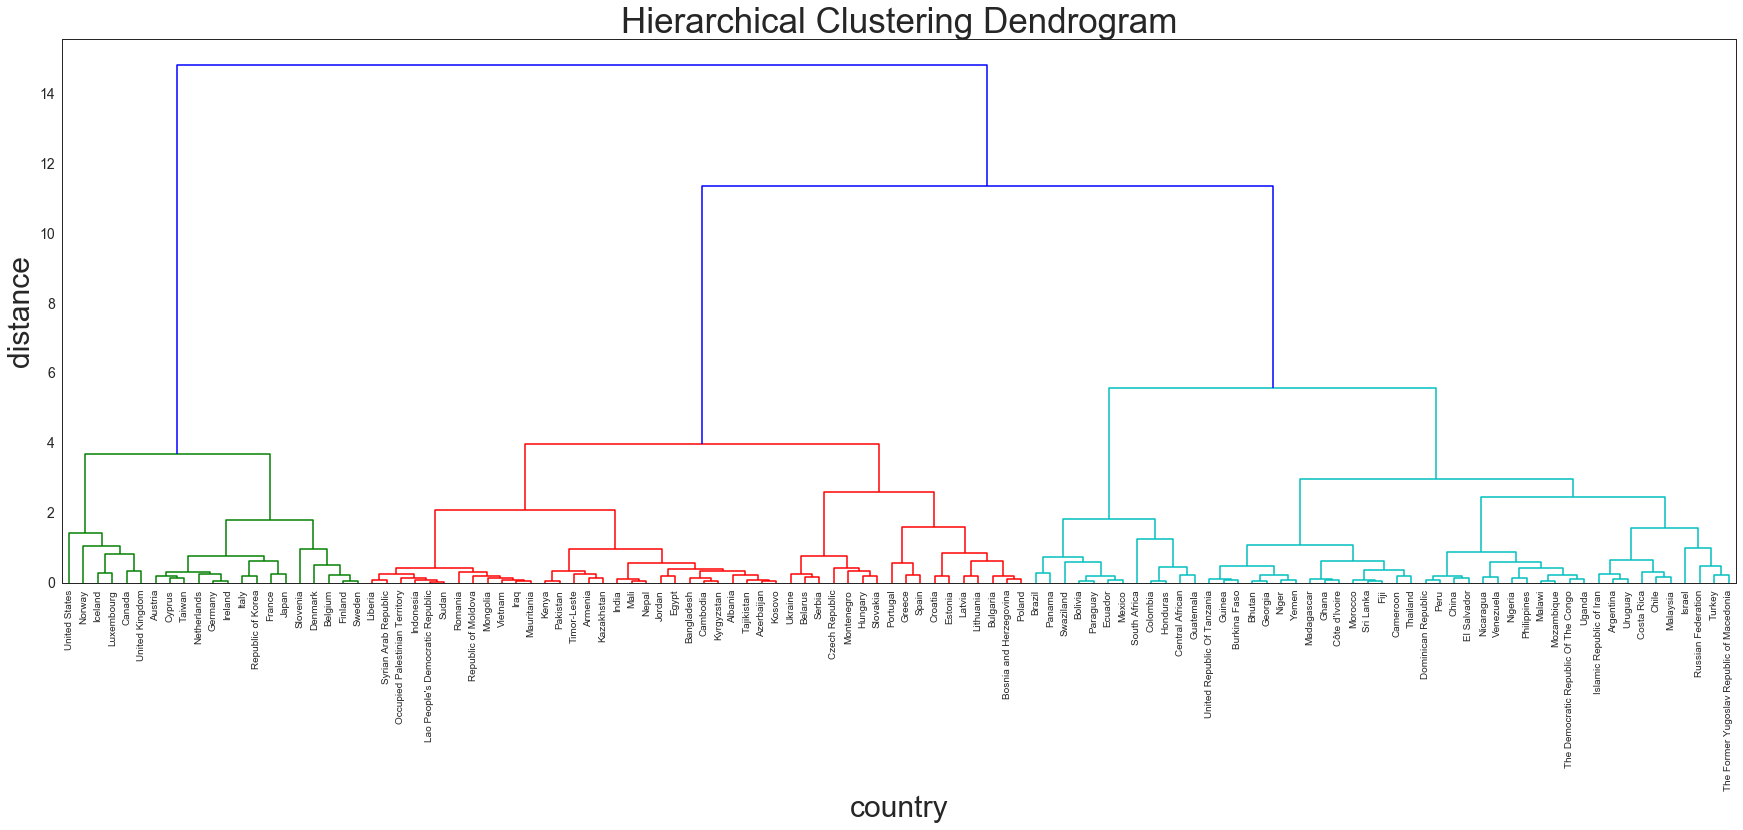

In [91]:
# creation de dendogramme
fig =plt.figure(figsize=(30,10))
sns.set_style('white')
plt.xlabel('country', fontsize=30)
plt.ylabel('distance', fontsize=30)
plt.title('Hierarchical Clustering Dendrogram', fontsize=35)


dendrogram(Z, labels = df_clustering.index, leaf_font_size=10, color_threshold=7, orientation='top')

plt.savefig("p7_graphic/dendogramme_principal.png")

plt.show()

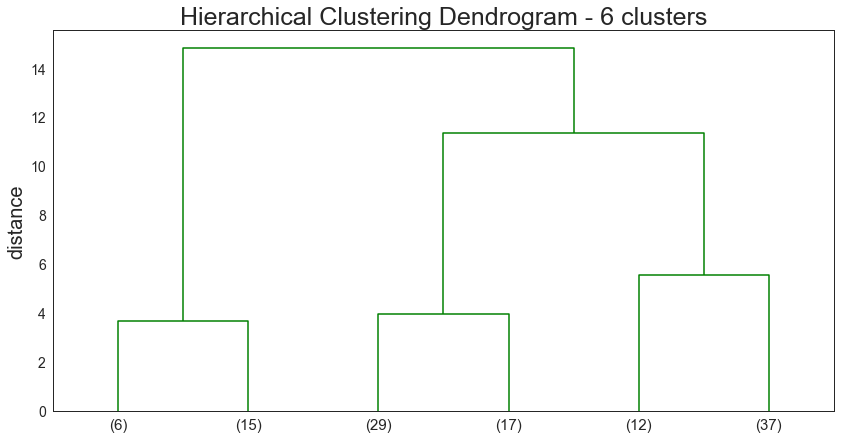

In [92]:
fig = plt.figure()
plt.ylabel('distance', fontsize=20)
plt.title('Hierarchical Clustering Dendrogram - 6 clusters', fontsize=25)


dendrogram(Z, labels = df_clustering.index, p=6, truncate_mode='lastp', leaf_font_size=15,color_threshold=25)

plt.savefig("p7_graphic/dendogramme_a_6_clusters.png")

plt.show()

In [93]:
# Identification des clusters
groupes_cah = fcluster(Z, 6, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah)))

Numérotation de nos groupes : [1 2 3 4 5 6]


In [94]:
#Index trié des groupes
idg = np.argsort(groupes_cah)

In [95]:
#Affichage des pays selon leurs groupes
df_groupes_cah = pd.DataFrame(df_clustering.index[idg], groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index':'Groupe'})
df_groupes_cah.head()

,Groupe,country
0,1,Luxembourg
1,1,Iceland
2,1,Canada
3,1,United Kingdom
4,1,United States


In [96]:
#Intégration des groupes dans notre échantillon de départ représenté par le dataframe "df_alim"
#Jointure interne nécessaire pour parvenir à agréger nos données
df_groupes_cah = pd.merge(df_groupes_cah, df_clustering, on="country")
df_groupes_cah.head()

,Groupe,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population,gini,income_avg
0,1,Luxembourg,LUX,73127.0,5780.83740,100,1,2008,485405,0.326,25217.562681
1,1,Iceland,ISL,36527.0,5191.96830,100,1,2008,310856,0.318,26888.511518
2,1,Canada,CAN,35895.0,122.42481,100,1,2008,33337638,0.350,23739.640518
3,1,United Kingdom,GBR,34048.0,1416.58030,100,1,2008,62145097,0.341,21709.604470
4,1,United States,USA,43261.0,663.47610,100,1,2008,303486012,0.408,25503.581661


In [97]:
#Préparation de sous-ensembles permettant de caractériser les groupes un à un
df_groupe1_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 1]

# liste pays
groupe_1= df_groupe1_cah["country"].unique()
groupe_1

array(['Luxembourg', 'Iceland', 'Canada', 'United Kingdom',
       'United States', 'Norway'], dtype=object)

In [98]:
df_groupe2_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 2]


# liste pays
groupe_2= df_groupe2_cah["country"].unique()
groupe_2

array(['Belgium', 'Finland', 'Germany', 'Netherlands', 'Denmark',
       'Cyprus', 'Slovenia', 'Sweden', 'France', 'Taiwan', 'Austria',
       'Ireland', 'Japan', 'Italy', 'Republic of Korea'], dtype=object)

In [99]:
df_groupe3_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 3]

# liste pays
groupe_3= df_groupe3_cah["country"].unique()
groupe_3

array(['Kazakhstan', 'Liberia', 'Nepal', 'Republic of Moldova', 'Kenya',
       'Iraq', 'Mauritania', 'Mali', 'Kyrgyzstan', 'Jordan', 'Indonesia',
       'Mongolia', 'India', 'Albania', 'Cambodia',
       "Lao People's Democratic Republic", 'Timor-Leste', 'Romania',
       'Azerbaijan', 'Vietnam', 'Kosovo', 'Sudan', 'Syrian Arab Republic',
       'Tajikistan', 'Bangladesh', 'Pakistan', 'Armenia', 'Egypt',
       'Occupied Palestinian Territory'], dtype=object)

In [100]:
df_groupe4_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 4]

# liste pays
groupe_4= df_groupe4_cah["country"].unique()
groupe_4

array(['Poland', 'Serbia', 'Lithuania', 'Ukraine', 'Spain', 'Slovakia',
       'Montenegro', 'Portugal', 'Latvia', 'Croatia',
       'Bosnia and Herzegovina', 'Bulgaria', 'Hungary', 'Belarus',
       'Czech Republic', 'Greece', 'Estonia'], dtype=object)

In [101]:
df_groupe5_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 5]

# liste pays
groupe_5= df_groupe5_cah["country"].unique()
groupe_5

array(['Bolivia', 'Brazil', 'Central African', 'Colombia', 'South Africa',
       'Ecuador', 'Paraguay', 'Panama', 'Swaziland', 'Mexico',
       'Guatemala', 'Honduras'], dtype=object)

In [102]:
df_groupe6_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 6]

# liste pays
groupe_6= df_groupe6_cah["country"].unique()
groupe_6

array(['Uganda', 'Cameroon', 'The Former Yugoslav Republic of Macedonia',
       'Malaysia', 'United Republic Of Tanzania', 'Malawi',
       'Burkina Faso', 'Uruguay', 'Venezuela', 'Yemen', 'Madagascar',
       'Islamic Republic of Iran', 'Bhutan', 'Fiji', 'Argentina',
       'Turkey', 'Thailand', 'Georgia', 'Sri Lanka', 'Niger', 'Nicaragua',
       'Ghana', 'Peru', 'Philippines', 'El Salvador', 'Mozambique',
       'Nigeria', 'Dominican Republic', 'Russian Federation',
       "Côte d'Ivoire", 'Costa Rica',
       'The Democratic Republic Of The Congo', 'Guinea', 'China', 'Chile',
       'Morocco', 'Israel'], dtype=object)

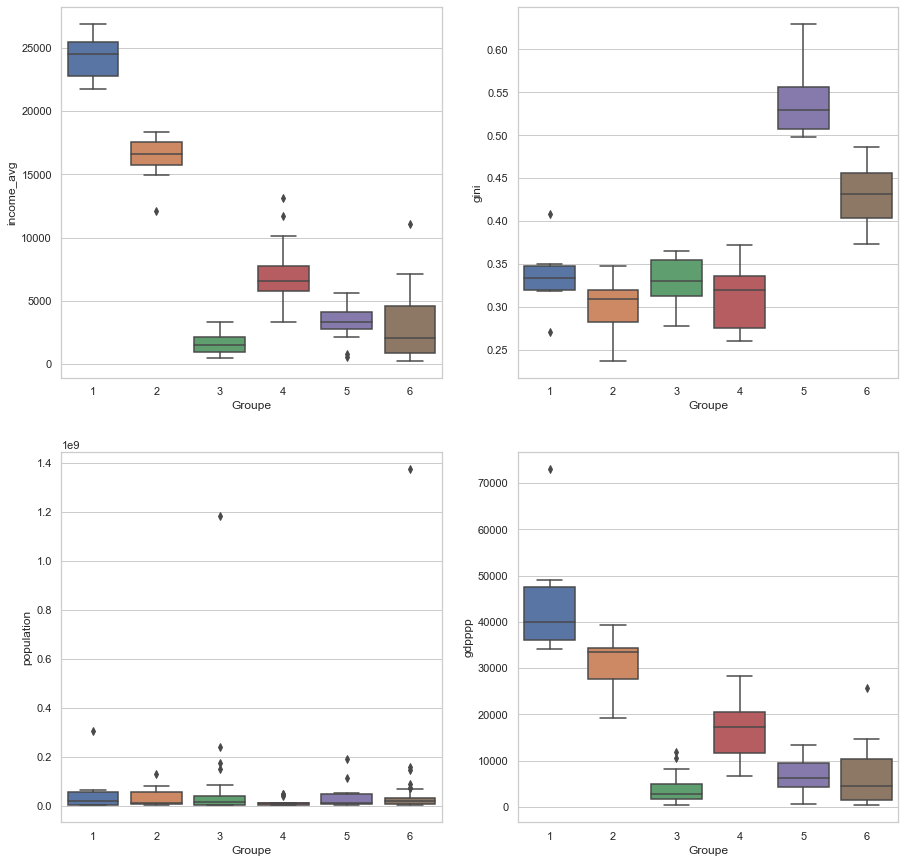

In [103]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='income_avg')

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='Groupe', y="gini")

plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='population')

plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='gdpppp')


plt.show(block=False)


**Groupe_1**
* Le revenu moyen (income_avg)est plus élevé que les autres groupes <br/>
* L'Indice de Gini (gini) est relativement faible (0.32 et 0.35). Il est plus proche proche de zéro que 1. La distribution n'est donc pas égalitaire (pas égale à zéro), elle est légèrement inégalitaire. <br/> <br/>


**Groupe_6**
* Le revenu moyen (income_avg)est le plus faible que les autres groupes <br/>
* Indice de Gini le plus élevé faible (0.46 à 0.63), dont 50% sont superieurs à 0.50. Il est plus proche proche de 1 que 0. La distribution est tres inégalitaire. <br/> <br/>

**SELECTION DES PAYS**

In [104]:
cah1= df_groupe1_cah[(df_groupe1_cah['country'] == 'Luxembourg')]
cah2= df_groupe2_cah[(df_groupe2_cah['country'] == 'Finland')]
cah3= df_groupe3_cah[(df_groupe3_cah['country'] == 'Albania')]
cah4= df_groupe4_cah[(df_groupe4_cah['country'] == 'Czech Republic')]
cah5= df_groupe5_cah[(df_groupe5_cah['country'] == 'Panama')]
cah6= df_groupe6_cah[(df_groupe6_cah['country'] == 'Russian Federation')]

cah_country= pd.concat([cah1, cah2, cah3, cah4, cah5, cah6])
df_cah_country=cah_country.sort_values('income', ascending=False)
df_cah_country

,Groupe,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population,gini,income_avg
0,1,Luxembourg,LUX,73127.0,5780.83740,100,1,2008,485405,0.326,25217.562681
7,2,Finland,FIN,33626.0,3248.90750,100,1,2008,5319449,0.278,16306.330495
64,4,Czech Republic,CZE,23223.0,1586.24710,100,1,2008,10425266,0.263,8235.293411
107,6,Russian Federation,RUS,14766.0,989.41860,100,1,2008,143248764,0.416,7156.770709
34,3,Albania,ALB,7297.0,728.89795,100,1,2008,3002678,0.300,2994.829902
74,5,Panama,PAN,11767.0,210.56883,100,1,2009,3579215,0.518,5135.139376


**DISTRIBUTION DE REVENUS**

In [105]:
cah_country_list=df_cah_country["country"].unique()
print(cah_country_list)

print(" ")
print("***************************")

cah_country_code=df_cah_country["country_code"].unique()
cah_country_code

['Luxembourg' 'Finland' 'Czech Republic' 'Russian Federation' 'Albania'
 'Panama']
 
***************************


array(['LUX', 'FIN', 'CZE', 'RUS', 'ALB', 'PAN'], dtype=object)

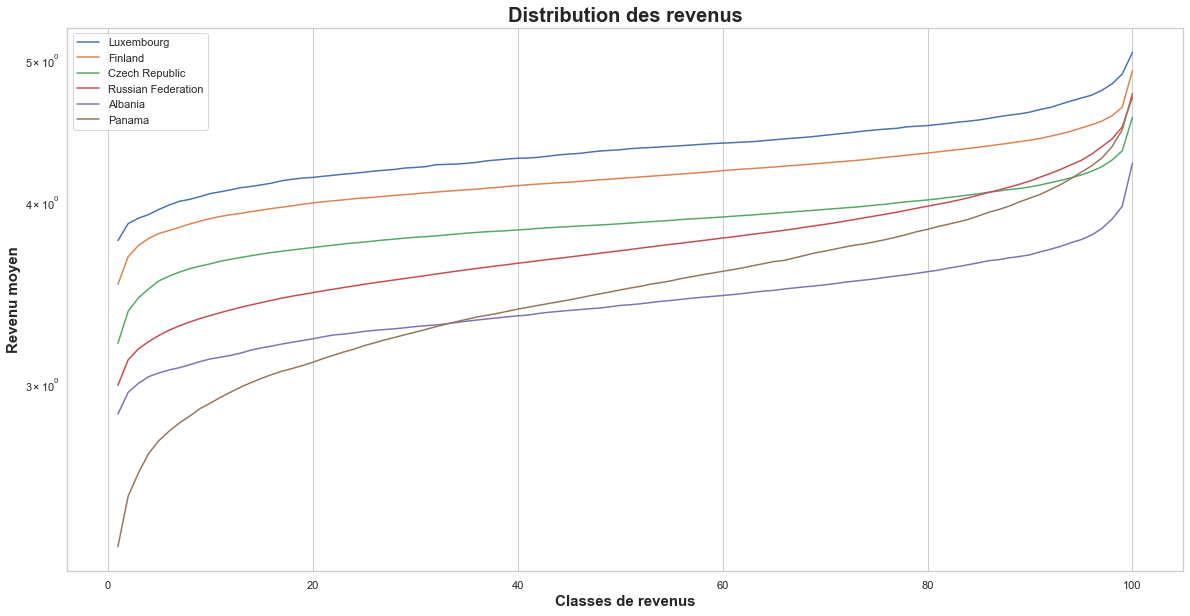

In [106]:
#Distribution des revenus 

# Paramètres généraux
plt.figure(figsize=(20,10))
plt.yscale('log')

for x in cah_country_list: 
    data = df_dataset[df_dataset.country == x]
    plt.plot(data['quantile'], np.log10(data['income']), label=x)

plt.title("Distribution des revenus", fontsize=20, fontweight='bold')
plt.xlabel("Classes de revenus", fontsize=15, fontweight='bold')
plt.ylabel("Revenu moyen", fontsize=15, fontweight='bold')
plt.legend()



plt.show()

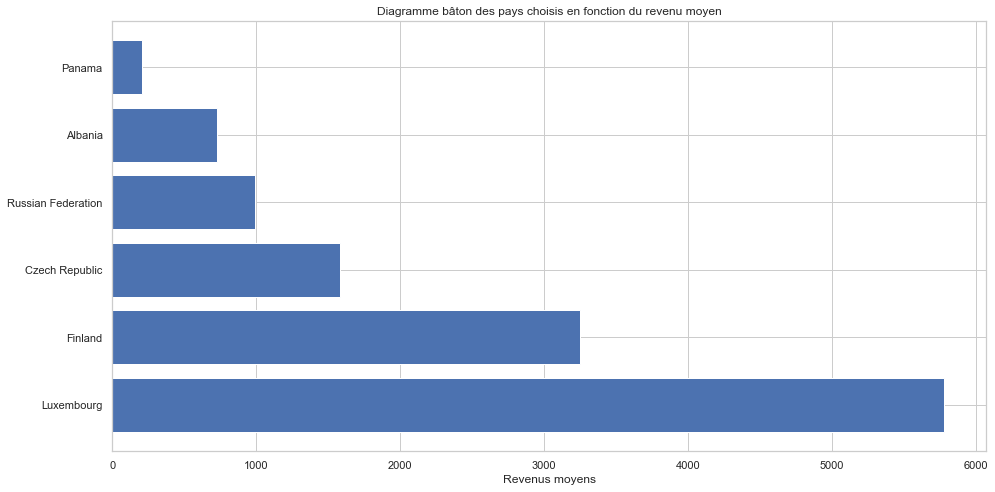

In [107]:

# Paramètres graphiques
plt.barh(df_cah_country.country, df_cah_country.income)

# Métadonnées
plt.title('Diagramme bâton des pays choisis en fonction du revenu moyen')
plt.xlabel('Revenus moyens')
plt.tight_layout() # Permet de ne pas couper les labels

# Sauvegarde
plt.show()

Text(0.5, 1.0, 'distribution revenus')

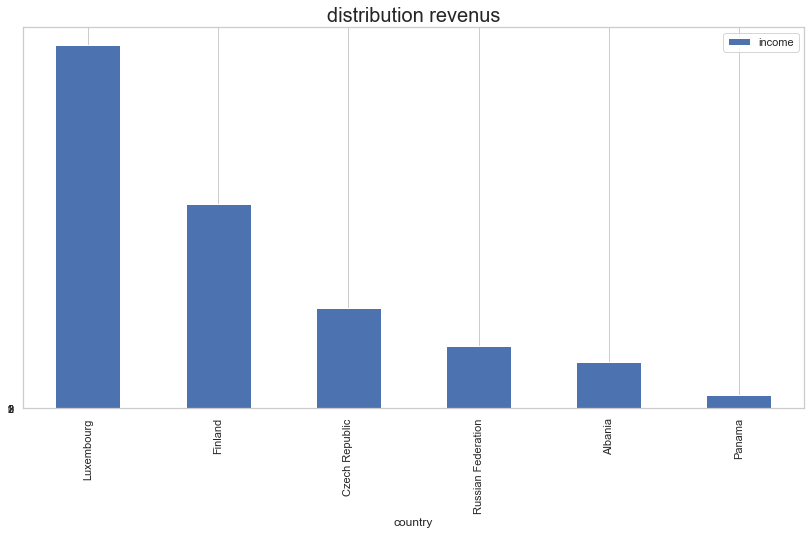

In [108]:


df_cah_country.plot.bar(x="country", y="income",  yticks=range(4))


plt.title('distribution revenus', Fontsize=20)

<h3> 2.2. Représentation de la courbe de Lorenz de chacun des pays choisis </h3> 


In [109]:
cah_country

,Groupe,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population,gini,income_avg
0,1,Luxembourg,LUX,73127.0,5780.83740,100,1,2008,485405,0.326,25217.562681
7,2,Finland,FIN,33626.0,3248.90750,100,1,2008,5319449,0.278,16306.330495
34,3,Albania,ALB,7297.0,728.89795,100,1,2008,3002678,0.300,2994.829902
64,4,Czech Republic,CZE,23223.0,1586.24710,100,1,2008,10425266,0.263,8235.293411
74,5,Panama,PAN,11767.0,210.56883,100,1,2009,3579215,0.518,5135.139376
107,6,Russian Federation,RUS,14766.0,989.41860,100,1,2008,143248764,0.416,7156.770709


In [110]:
df_luxembourg=df_dataset[(df_dataset['country'] == 'Luxembourg')]
df_finland=df_dataset[(df_dataset['country'] == 'Finland')]
df_albania=df_dataset[(df_dataset['country'] == 'Albania')]
df_czech_republic=df_dataset[(df_dataset['country'] == 'Czech Republic')]
df_panama=df_dataset[(df_dataset['country'] == 'Panama')]
df_russian_federation=df_dataset[(df_dataset['country'] == 'Russian Federation')]

In [111]:
dt_luxembourg=dataset_gini[(dataset_gini['country'] == 'Iceland')]
dt_iceland=dataset_gini[(dataset_gini['country'] == 'Iceland')]
dt_norway=dataset_gini[(dataset_gini['country'] == 'Norway')]
dt_uk=dataset_gini[(dataset_gini['country'] == 'United Kingdom')]
dt_usa=dataset_gini[(dataset_gini['country'] == 'United States')]
dt_canada=dataset_gini[(dataset_gini['country'] == 'Canada')]

 * Courbes de Lorenz des 6 pays selectionnés

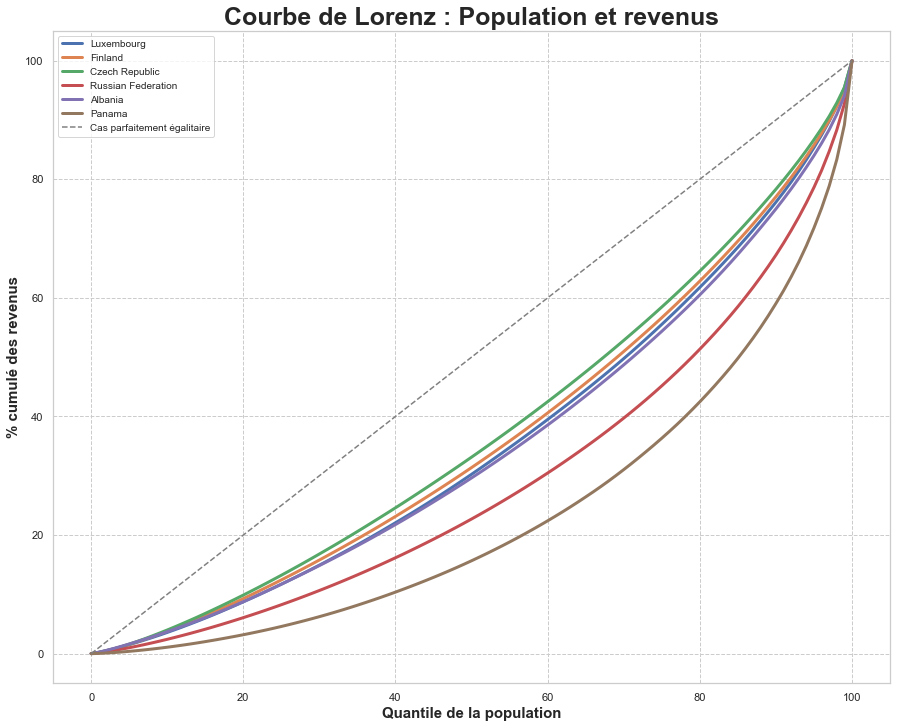

In [112]:
#Courbe de Lorenz
plt.figure(figsize = (15, 12))
list_gini = []

for count in cah_country_list:
    # revenus_total_pays : Revenus total sur les 100 centiles
    revenus_total_pays = dataset[dataset.country==count]['income'].sum()
    
    dep = dataset[dataset.country==count]['income'].values
    n = len(dep)
    
    # lorenz : Courbe de lorenz
    lorenz = (np.cumsum(np.sort(dataset[dataset.country==count]['income']))/revenus_total_pays)*100
    lorenz = np.append([0],lorenz) 
    x = np.append([0],dataset[dataset.country==count]['quantile'])    
    plt.plot(x,lorenz,linewidth=3, label=count)

    
plt.plot([0,100],[0,100],'grey',linestyle='--',linewidth=1.5, label='Cas parfaitement égalitaire')
plt.xlabel('Quantile de la population',fontsize=15,fontweight = 'bold')
plt.ylabel('% cumulé des revenus',fontsize=15,fontweight = 'bold')
plt.legend(loc='upper left',fontsize=10)
plt.grid(True,linestyle='--')
plt.title('Courbe de Lorenz : Population et revenus',fontsize=25,fontweight = 'bold') 
plt.show()

* Cas du Luxembourg

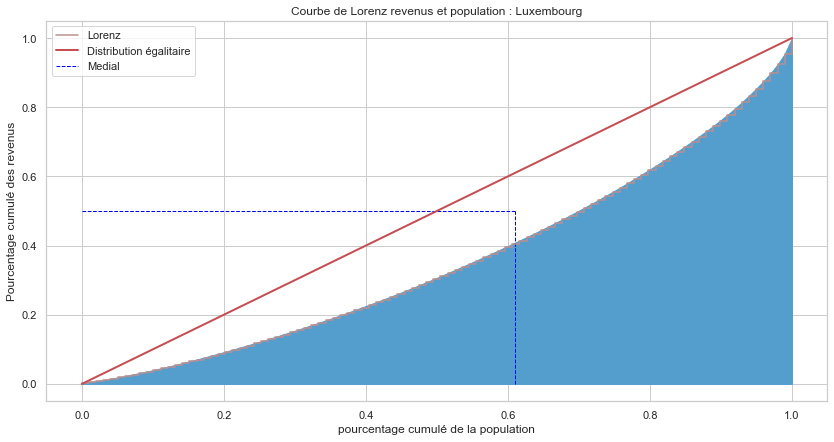

In [113]:
# CAS DE LUXEMBOURG

#Courbe de Lorenz lux
income_luxemb = df_luxembourg['income'].values

# Placer les observations dans une variable
lorenz_luxembourg = np.cumsum(np.sort(income_luxemb)) / income_luxemb.sum()


plt.plot(np.linspace(0,1,len(lorenz_luxembourg)), lorenz_luxembourg, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_luxembourg)) ,lorenz_luxembourg , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.61, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.61, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz revenus et population : Luxembourg')
plt.xlabel("pourcentage cumulé de la population")
plt.ylabel("Pourcentage cumulé des revenus")


plt.legend(loc="best")

plt.show()

In [114]:
# Aire sous la courbe de Lorenz 
aire_lorenz_luxembourg = lorenz_luxembourg[:-1].sum()/len(lorenz_luxembourg) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_lorenz_luxembourg
gini_luxembourg = round(2*S, 3)

print("L'indice de Gini Luxembourg est égal à {}".format(gini_luxembourg))


L'indice de Gini Luxembourg est égal à 0.303


 Cas de la Finland

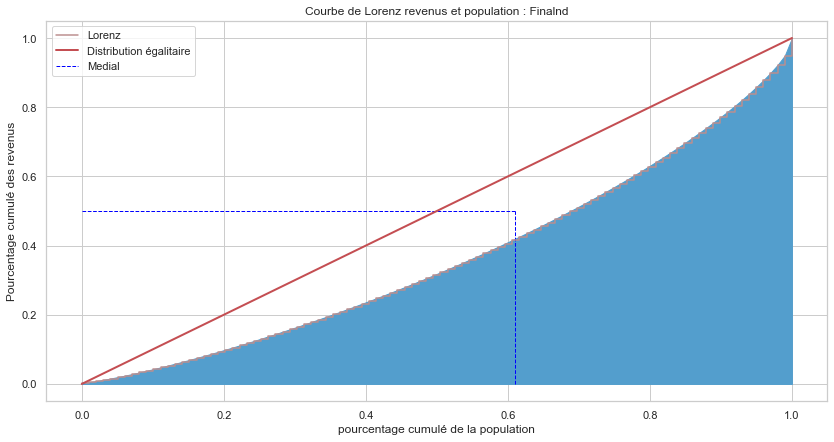

In [115]:
# CAS DE LA FINLAND

#Courbe de Lorenz lux
income_finland = df_finland['income'].values

# Placer les observations dans une variable
lorenz_finland = np.cumsum(np.sort(income_finland)) / income_finland.sum()


plt.plot(np.linspace(0,1,len(lorenz_finland)), lorenz_finland, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_finland)) ,lorenz_finland, color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.61, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.61, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz revenus et population : Finalnd')
plt.xlabel("pourcentage cumulé de la population")
plt.ylabel("Pourcentage cumulé des revenus")


plt.legend(loc="best")

plt.show()

In [116]:
# Aire sous la courbe de Lorenz 
aire_lorenz_finland = lorenz_finland[:-1].sum()/len(lorenz_finland) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_lorenz_finland
gini_finland = round(2*S, 3)

print("L'indice de Gini Finland est égal à {}".format(gini_finland))

L'indice de Gini Finland est égal à 0.287


 * Cas de Albania

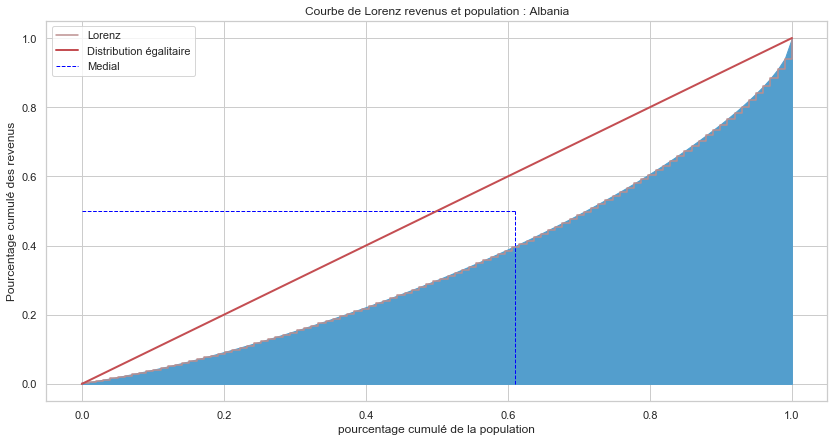

In [117]:

# ALBANIA

#Courbe de Lorenz lux
income_albania = df_albania['income'].values

# Placer les observations dans une variable
lorenz_albania = np.cumsum(np.sort(income_albania)) / income_albania.sum()


plt.plot(np.linspace(0,1,len(lorenz_albania)), lorenz_albania, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_albania)) ,lorenz_albania, color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.61, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.61, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz revenus et population : Albania')
plt.xlabel("pourcentage cumulé de la population")
plt.ylabel("Pourcentage cumulé des revenus")


plt.legend(loc="best")

plt.show()

In [118]:
# Aire sous la courbe de Lorenz 
aire_lorenz_albania = lorenz_albania[:-1].sum()/len(lorenz_albania) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_lorenz_albania
gini_albania = round(2*S, 3)

print("L'indice de Gini Albania est égal à {}".format(gini_albania))

L'indice de Gini Albania est égal à 0.315


 Cas de CZECH REPUBLIC

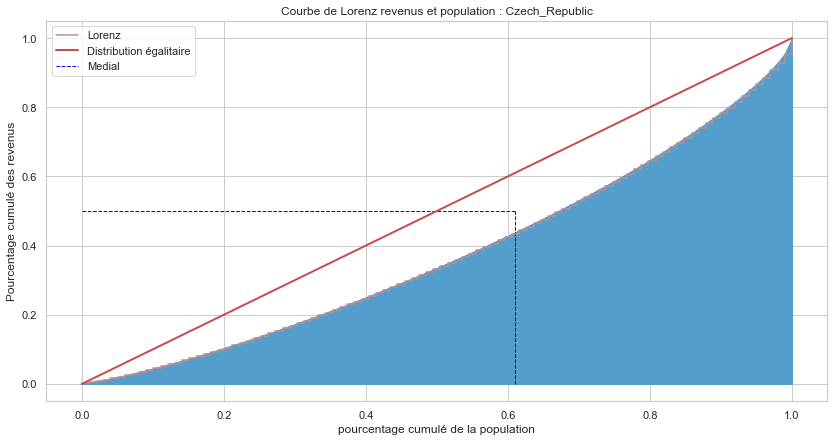

In [119]:
# CZECH REPUBLIC

#Courbe de Lorenz UK
income_czech_republic = df_czech_republic['income'].values

# Placer les observations dans une variable
lorenz_czech_republic = np.cumsum(np.sort(income_czech_republic)) / income_czech_republic.sum()


plt.plot(np.linspace(0,1,len(lorenz_czech_republic)), lorenz_czech_republic, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_czech_republic)) ,lorenz_czech_republic, color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.61, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.61, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz revenus et population : Czech_Republic')
plt.xlabel("pourcentage cumulé de la population")
plt.ylabel("Pourcentage cumulé des revenus")


plt.legend(loc="best")

plt.show()

In [120]:
# Aire sous la courbe de Lorenz 
aire_lorenz_czech_republic = lorenz_czech_republic[:-1].sum()/len(lorenz_czech_republic) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_lorenz_czech_republic
gini_czech_republic = round(2*S, 3)

print("L'indice de Gini czech_republic est égal à {}".format(gini_czech_republic))


L'indice de Gini czech_republic est égal à 0.263


Cas de Panama

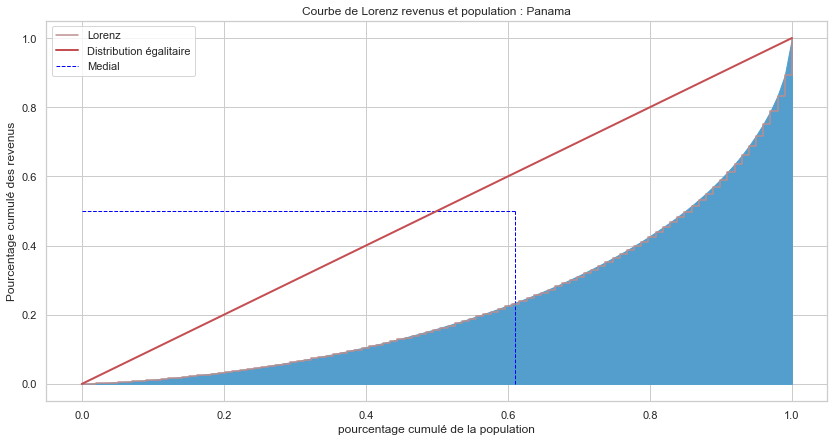

In [121]:
# PANAMA


#Courbe de Lorenz PANAMA
income_panama = df_panama['income'].values

# Placer les observations dans une variable
lorenz_panama= np.cumsum(np.sort(income_panama)) / income_panama.sum()


plt.plot(np.linspace(0,1,len(lorenz_panama)), lorenz_panama, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_panama)) ,lorenz_panama, color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.61, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.61, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz revenus et population : Panama')
plt.xlabel("pourcentage cumulé de la population")
plt.ylabel("Pourcentage cumulé des revenus")


plt.legend(loc="best")

plt.show()

In [122]:
# Aire sous la courbe de Lorenz 
aire_lorenz_panama = lorenz_panama[:-1].sum()/len(lorenz_panama) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_lorenz_panama
gini_panama= round(2*S, 3)

print("L'indice de Gini Panama est égal à {}".format(gini_panama))


L'indice de Gini Panama est égal à 0.542


Cas de Russian

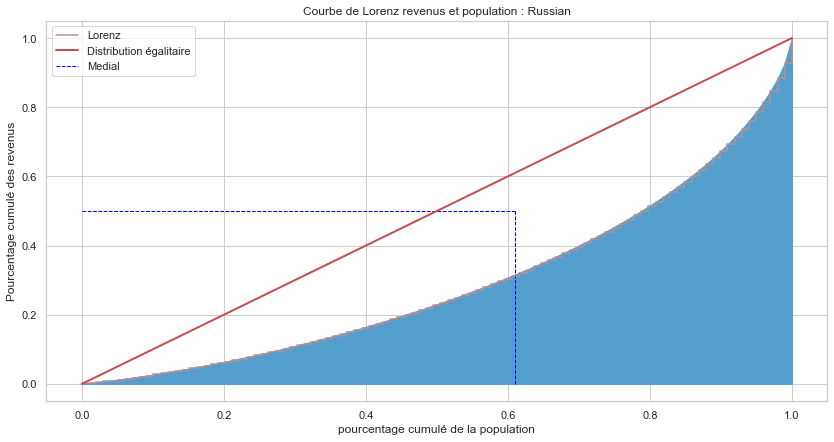

In [123]:
# CAS DE RUSSIAN

#Courbe de Loren Russian
income_russian = df_russian_federation['income'].values

# Placer les observations dans une variable
lorenz_russian = np.cumsum(np.sort(income_russian)) / income_russian.sum()


plt.plot(np.linspace(0,1,len(lorenz_russian)), lorenz_russian, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_russian)) ,lorenz_russian, color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.61, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.61, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz revenus et population : Russian')
plt.xlabel("pourcentage cumulé de la population")
plt.ylabel("Pourcentage cumulé des revenus")


plt.legend(loc="best")

plt.show()

In [124]:
# Aire sous la courbe de Lorenz 
aire_lorenz_russian = lorenz_russian[:-1].sum()/len(lorenz_russian) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_lorenz_russian
gini_russian = round(2*S, 2)

print("L'indice de Gini russian est égal à {}".format(gini_russian))

L'indice de Gini russian est égal à 0.43


<h3> 2.3. Evolution Indice de Gini </h3> 

In [125]:
#Chargement du dataset, Fichier de la World Income Distribution
gini_df = pd.read_csv('gini2.csv', skiprows=3, skipinitialspace=True, index_col=1)

gini_df.head(2)

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,Afghanistan,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# Mise en forme des données

# Réinitialisez l'index du DataFrame 
gini_df.reset_index(inplace=True)

# renommer les colonnes
gini_df.rename(columns={'Country Name': 'Country'}, inplace =True)

# supprimer certaines colonnes
gini_df.drop(columns=['Country Code',
                      'Indicator Name',
                      'Indicator Code',
                       'Unnamed: 65'], inplace = True)

# transformer colonne "country" en index
gini_df.set_index('Country', inplace=True)

# diviser all columns by100
gini_df = gini_df/100

gini_df



,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.29,NaN,0.346,0.329,0.337,0.332,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.278,0.29,0.263,0.273,0.265,0.267,0.290,NaN,NaN,NaN
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.367,NaN,NaN,NaN,NaN,NaN,NaN
South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.630,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
gini_luxemb = gini_df.loc[gini_df.index == 'Luxembourg'].iloc[0:].dropna(axis=1)
gini_luxemb

,1985,1991,1994,1997,2000,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Luxembourg,0.267,0.268,0.269,0.302,0.304,0.302,0.302,0.308,0.309,0.311,...,0.312,0.305,0.321,0.343,0.32,0.312,0.329,0.317,0.345,0.354


In [128]:
gini_finland = gini_df.loc[gini_df.index == 'Finland'].iloc[0:].dropna(axis=1)
gini_finland

,1987,1991,1995,2000,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,
Finland,0.222,0.229,0.235,0.272,0.277,0.279,0.276,0.28,0.283,0.278,0.275,0.277,0.276,0.271,0.272,0.268,0.271,0.271,0.274,0.273


In [129]:
gini_czech_republic= gini_df.loc[gini_df.index == 'Czech Republic'].iloc[0:].dropna(axis=1)
gini_czech_republic

,1992,1993,1996,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,
Czech Republic,0.207,0.266,0.258,0.266,0.275,0.269,0.267,0.26,0.263,0.262,0.266,0.264,0.261,0.265,0.259,0.259,0.254,0.249,0.25


In [130]:
gini_russian= gini_df.loc[gini_df.index == 'Russian Federation'].iloc[0:].dropna(axis=1)
gini_russian

,1993,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Russian Federation,0.484,0.461,0.384,0.381,0.374,0.371,0.369,0.373,0.4,0.403,...,0.398,0.395,0.397,0.407,0.409,0.399,0.377,0.368,0.372,0.375


In [131]:
gini_albania= gini_df.loc[gini_df.index == 'Albania'].iloc[0:].dropna(axis=1)
gini_albania

,1996,2002,2005,2008,2012,2014,2015,2016,2017
Country,,,,,,,,,
Albania,0.27,0.317,0.306,0.3,0.29,0.346,0.329,0.337,0.332


In [132]:
gini_panama= gini_df.loc[gini_df.index == 'Panama'].iloc[0:].dropna(axis=1)
gini_panama

,1979,1989,1991,1995,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Panama,0.487,0.589,0.582,0.578,0.582,0.575,0.565,0.566,0.567,0.561,...,0.516,0.513,0.517,0.515,0.505,0.508,0.504,0.499,0.492,0.498


In [133]:
# regrouper les 6 pays
evol_gini = pd.concat([gini_luxemb, gini_finland, gini_czech_republic, gini_russian, gini_albania, gini_panama])
evol_gini.index.name = 'index'
evol_gini

,1985,1991,1994,1997,2000,2003,2004,2005,2006,2007,...,1992,1993,1996,2002,1998,1999,2001,1979,1989,2019
index,,,,,,,,,,,,,,,,,,,,,
Luxembourg,0.267,0.268,0.269,0.302,0.304,0.302,0.302,0.308,0.309,0.311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Finland,NaN,0.229,NaN,NaN,0.272,0.277,0.279,0.276,0.280,0.283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,0.275,0.269,0.267,0.260,...,0.207,0.266,0.258,0.266,NaN,NaN,NaN,NaN,NaN,NaN
Russian Federation,NaN,NaN,NaN,0.384,0.371,0.400,0.403,0.413,0.410,0.423,...,NaN,0.484,0.461,0.373,0.381,0.374,0.369,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.306,NaN,NaN,...,NaN,NaN,0.270,0.317,NaN,NaN,NaN,NaN,NaN,NaN
Panama,NaN,0.582,NaN,0.582,0.566,0.557,0.548,0.538,0.546,0.527,...,NaN,NaN,NaN,0.561,0.575,0.565,0.567,0.487,0.589,0.498


In [134]:
 # transposer le dataframe
evol_gini_trans=evol_gini.T
evol_gini_trans.head()


index,Luxembourg,Finland,Czech Republic,Russian Federation,Albania,Panama
1985,0.267,NaN,NaN,NaN,NaN,NaN
1991,0.268,0.229,NaN,NaN,NaN,0.582
1994,0.269,NaN,NaN,NaN,NaN,NaN
1997,0.302,NaN,NaN,0.384,NaN,0.582
2000,0.304,0.272,NaN,0.371,NaN,0.566


In [135]:

# reinitialiser index
evol_gini_trans.reset_index(level=0, inplace=True)

# renomer une colonne
evol_gini_trans = evol_gini_trans.rename(columns={'index': 'year'})

evol_gini_trans





index,year,Luxembourg,Finland,Czech Republic,Russian Federation,Albania,Panama
0,1985,0.267,NaN,NaN,NaN,NaN,NaN
1,1991,0.268,0.229,NaN,NaN,NaN,0.582
2,1994,0.269,NaN,NaN,NaN,NaN,NaN
3,1997,0.302,NaN,NaN,0.384,NaN,0.582
4,2000,0.304,0.272,NaN,0.371,NaN,0.566
5,2003,0.302,0.277,NaN,0.400,NaN,0.557
6,2004,0.302,0.279,0.275,0.403,NaN,0.548
7,2005,0.308,0.276,0.269,0.413,0.306,0.538
8,2006,0.309,0.280,0.267,0.410,NaN,0.546
9,2007,0.311,0.283,0.260,0.423,NaN,0.527


In [136]:
evolution_gini=evol_gini_trans.loc[(evol_gini_trans["year"]== "2004")|\
          (evol_gini_trans["year"]== "2005")|\
          (evol_gini_trans["year"]== "2006") |\
          (evol_gini_trans["year"]== "2007") |\
          (evol_gini_trans["year"]== "2008") |\
          (evol_gini_trans["year"]== "2009") |\
          (evol_gini_trans["year"]== "2010") |\
          (evol_gini_trans["year"]== "2011") |\
          (evol_gini_trans["year"]== "2012")|\
          (evol_gini_trans["year"]== "2013") |
          (evol_gini_trans["year"]== "2014") |\
          (evol_gini_trans["year"]== "2015")|\
          (evol_gini_trans["year"]== "2016")
         ]
evolution_gini.head(1)

index,year,Luxembourg,Finland,Czech Republic,Russian Federation,Albania,Panama
6,2004,0.302,0.279,0.275,0.403,NaN,0.548


<Figure size 1080x1080 with 0 Axes>

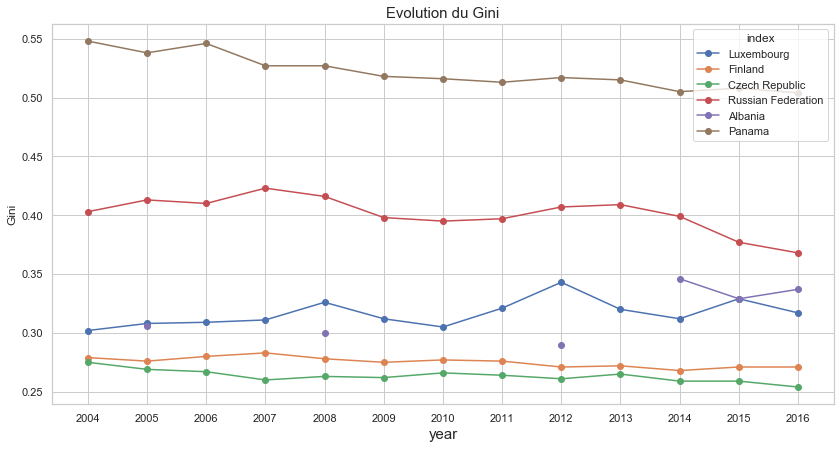

In [137]:

fig =plt.figure(figsize=(15, 15))

evolution_gini.plot(x='year', y=["Luxembourg","Finland", "Czech Republic","Russian Federation", "Albania", "Panama"],\
        xticks=range(13),  marker = 'o')

plt.title('Evolution du Gini', Fontsize=15)
plt.xlabel('year', Fontsize=15)
plt.ylabel('Gini')
 
plt.show()

<h3> 2.4. Classification par Indice de Gini </h3> 

In [138]:
# Classement selon l'indice de Gini
dataset_gini_mean = dataset_gini.groupby(by='country').mean()
dataset_gini_mean.reset_index()



gini_rank= dataset_gini_mean.sort_values(by='gini', ascending=False)
gini_rank.reset_index(inplace=True)
gini_rank


# Les 5 pays avec le plus haut indice de Gini
max_five_gini = gini_rank.head()

max_five_gini

,country,gdpppp,income,nb_quantiles,quantile,year,population,gini
0,South Africa,9602.0,5617.904880,100.0,50.5,2008,49779471,0.630
1,Guatemala,4367.0,2142.474753,100.0,50.5,2011,14948801,0.568
2,Central African,685.0,811.299901,100.0,50.5,2008,4273366,0.562
3,Honduras,3628.0,3296.268419,100.0,50.5,2008,7980955,0.555
4,Colombia,8185.0,3547.005276,100.0,50.5,2008,44254975,0.553


In [139]:
# Moyenne de l'indice de Gini des 5 plus forts indices
max_five_gini['gini'].mean()

0.5735999999999997

In [140]:
# Les 5 pays avec le plus faible indice de Gini
min_five_gini = gini_rank.tail()

min_five_gini

,country,gdpppp,income,nb_quantiles,quantile,year,population,gini
111,Ukraine,6721.0,3349.388306,100.0,50.5,2008,46158710,0.266
112,Czech Republic,23223.0,8235.293411,100.0,50.5,2008,10425266,0.263
113,Slovakia,20515.0,6096.579894,100.0,50.5,2008,5399371,0.260
114,Denmark,34130.0,17043.146491,100.0,50.5,2008,5497729,0.252
115,Slovenia,27197.0,12106.007475,100.0,50.5,2008,2023052,0.237


In [141]:
min_five_gini['gini'].mean()

0.25559999999999994

In [142]:
# Position de la France (77 ème)
gini_rank.loc[gini_rank['country'] == 'France']

,country,gdpppp,income,nb_quantiles,quantile,year,population,gini
76,France,30357.0,18309.407545,100.0,50.5,2008,62209207,0.33


 <h2> MISSION 3. ETUDE DES CLASSES DE REVENUS DES PARENTS</h2>

In [143]:
#Fichier elasticity.txt
elasticity_file = pd.read_csv('elasticity.txt', sep = "\t")[:16]
elasticity_file

,Coefficients of intergenerational elasticity between parents’ and
0,children’s income
1,| Base case | Optim...
2,| | (high...
3,----------------------------------------------...
4,Nordic European countries | 0.2 | ...
5,and Canada | | ...
6,----------------------------------------------...
7,Europe (except nordic | 0.4 | ...
8,countries) | | ...
9,----------------------------------------------...


In [144]:
#Chargement et traitement des données GDIM
# source : https://www.worldbank.org/en/topic/poverty/brief/what-is-the-global-database-on-intergenerational-mobility-gdim

# import
gdim = pd.read_csv('gdim_may_2018.csv')


# selection de colonnes (projection)
gdim = pd.read_csv('gdim_may_2018.csv').loc[:, ['countryname', 'iso3', 'region', 'IGEincome']]
gdim

# rename de colonnes
gdim.rename(columns={'countryname': 'country', 'iso3' : 'country_code'}, inplace=True)

# supprimer les doublons
gdim.drop_duplicates(inplace=True)

# extraire une ligne par pays
gdim.drop_duplicates(subset=['country'], keep = 'last', inplace=True)


display(gdim.head(5))
display(gdim.shape)

,country,country_code,region,IGEincome
0,Afghanistan,AFG,South Asia,NaN
12,Angola,AGO,Sub-Saharan Africa,NaN
60,Albania,ALB,Europe & Central Asia,0.815874
84,Argentina,ARG,Latin America & Caribbean,NaN
99,Armenia,ARM,Europe & Central Asia,NaN


(150, 4)

In [145]:
# Pays a valeur manquantes pour la variable 'IGEincome'
nan_gdim = gdim[gdim['IGEincome'].isna()]
display(nan_gdim.head())
display(len(nan_gdim))

,country,country_code,region,IGEincome
0,Afghanistan,AFG,South Asia,NaN
12,Angola,AGO,Sub-Saharan Africa,NaN
84,Argentina,ARG,Latin America & Caribbean,NaN
99,Armenia,ARM,Europe & Central Asia,NaN
279,Azerbaijan,AZE,Europe & Central Asia,NaN


77

In [146]:
#Identification des pays sans valeur pour la variable 'IGEincome'
nan_countries_gdim = nan_gdim['country_code'].unique()
nan_countries_gdim = list(nan_countries_gdim)
len(nan_countries_gdim)

77

In [147]:
#Visualisation des régions concernées 
list(nan_gdim.region.unique())

['South Asia',
 'Sub-Saharan Africa',
 'Latin America & Caribbean',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'High income',
 'East Asia & Pacific']

In [157]:
#pays concernés par la région 'High income'
nan_gdim[nan_gdim['region'] == 'High income']['country'].unique()

array(['Estonia', 'Hungary', 'Iceland', 'Israel', 'Lithuania', 'Poland',
       'Uruguay'], dtype=object)

In [158]:
#Boucle itérative afin d'imputer les valeurs NaN sur la variable 'IGEincome'
for code in nan_countries_gdim :
    if list(gdim.loc[gdim['country_code'] == code, 'region']) == ['South Asia']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.50
    elif list(gdim.loc[gdim['country_code'] == code, 'region']) == ['Sub-Saharan Africa']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.66
    elif list(gdim.loc[gdim['country_code'] == code, 'region']) == ['Latin America & Caribbean']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.66
    elif list(gdim.loc[gdim['country_code'] == code, 'region']) == ['Europe & Central Asia']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.40                                                               
    elif list(gdim.loc[gdim['country_code'] == code, 'region']) == ['East Asia & Pacific']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.50
    else : gdim.loc[gdim['country_code'] == code, 'IGEincome'] =  0.40

In [159]:
#Jointure avec notre dataframe 'df' et celui obtenu 'gdim'
#'IGEincome' sera renommé en 'pj'
dataset_elasticity= pd.merge(df_dataset, gdim[['country_code', 'IGEincome']], how='left', on='country_code')
dataset_elasticity.rename(columns={'IGEincome': 'pj'}, inplace=True)
dataset_elasticity.head()

,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population,gini,income_avg,pj
0,Albania,ALB,7297.0,728.89795,100,1,2008,3002678,0.3,2994.829902,0.815874
1,Albania,ALB,7297.0,916.66235,100,2,2008,3002678,0.3,2994.829902,0.815874
2,Albania,ALB,7297.0,1010.91600,100,3,2008,3002678,0.3,2994.829902,0.815874
3,Albania,ALB,7297.0,1086.90780,100,4,2008,3002678,0.3,2994.829902,0.815874
4,Albania,ALB,7297.0,1132.69970,100,5,2008,3002678,0.3,2994.829902,0.815874


In [160]:
#Vérification des éventuelles valeurs manquantes
last_nan_country = list(dataset_elasticity[dataset_elasticity['pj'].isna()]['country'].unique())
last_nan_country

['Syrian Arab Republic', 'Kosovo']

NB.
* La Syrie est un pays d'Asie, son pj est 0.50 <br/>
* Le Kosovo est un pays d'Europe du Sud > pj = 0.40

In [161]:
#ajout des valeurs 
for country in last_nan_country :
    if list(dataset_elasticity[dataset_elasticity['country'] == "Kosovo"]):
        dataset_elasticity.loc[dataset_elasticity['country'] == country, 'pj'] = 0.40
    else : 
        dataset_elasticity.loc[dataset_elasticity['country'] == country, 'pj'] = 0.50

In [162]:
# autre verification
dataset_elasticity.isna().any()

country         False
country_code    False
gdpppp          False
income          False
nb_quantiles    False
quantile        False
year            False
population      False
gini            False
income_avg      False
pj              False
dtype: bool

In [163]:
dataset_elasticity.head()

,country,country_code,gdpppp,income,nb_quantiles,quantile,year,population,gini,income_avg,pj
0,Albania,ALB,7297.0,728.89795,100,1,2008,3002678,0.3,2994.829902,0.815874
1,Albania,ALB,7297.0,916.66235,100,2,2008,3002678,0.3,2994.829902,0.815874
2,Albania,ALB,7297.0,1010.91600,100,3,2008,3002678,0.3,2994.829902,0.815874
3,Albania,ALB,7297.0,1086.90780,100,4,2008,3002678,0.3,2994.829902,0.815874
4,Albania,ALB,7297.0,1132.69970,100,5,2008,3002678,0.3,2994.829902,0.815874


In [164]:
len(dataset_elasticity)

11600

**3.1. GENERATION DE CLASSES REVENU DES PARENTS**